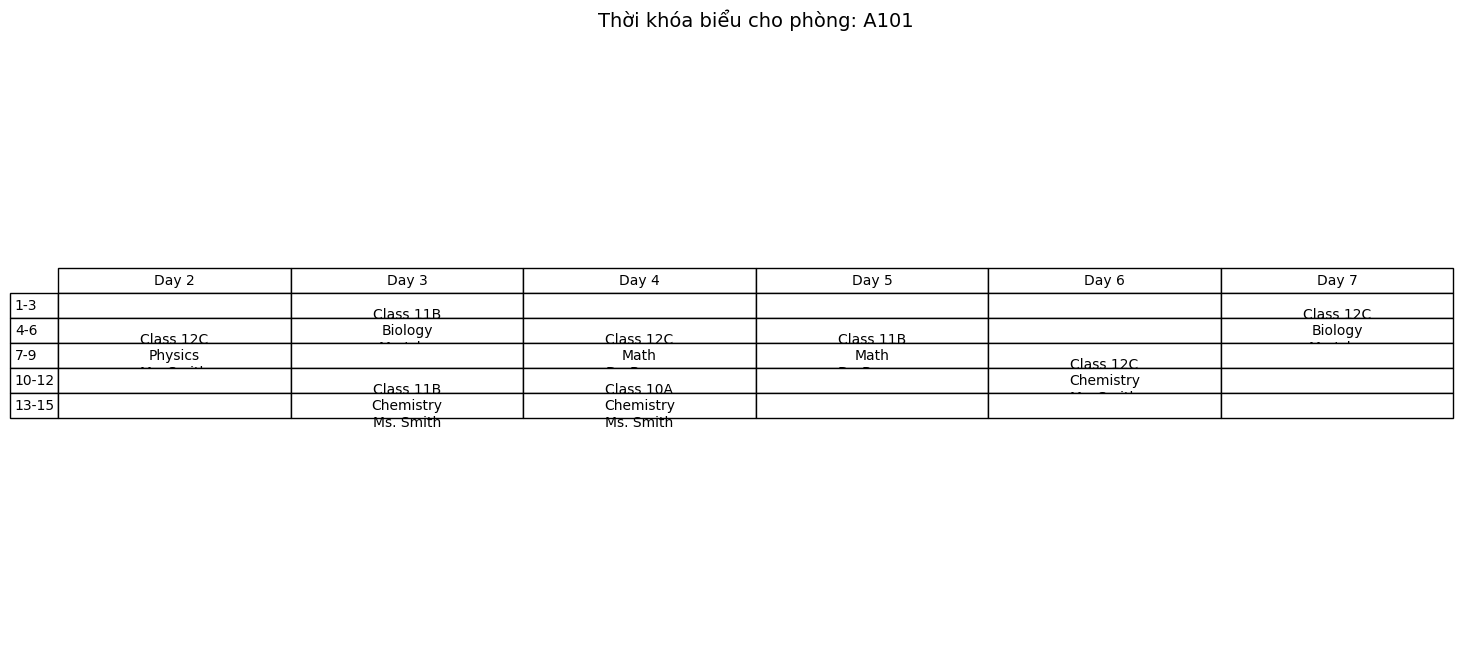

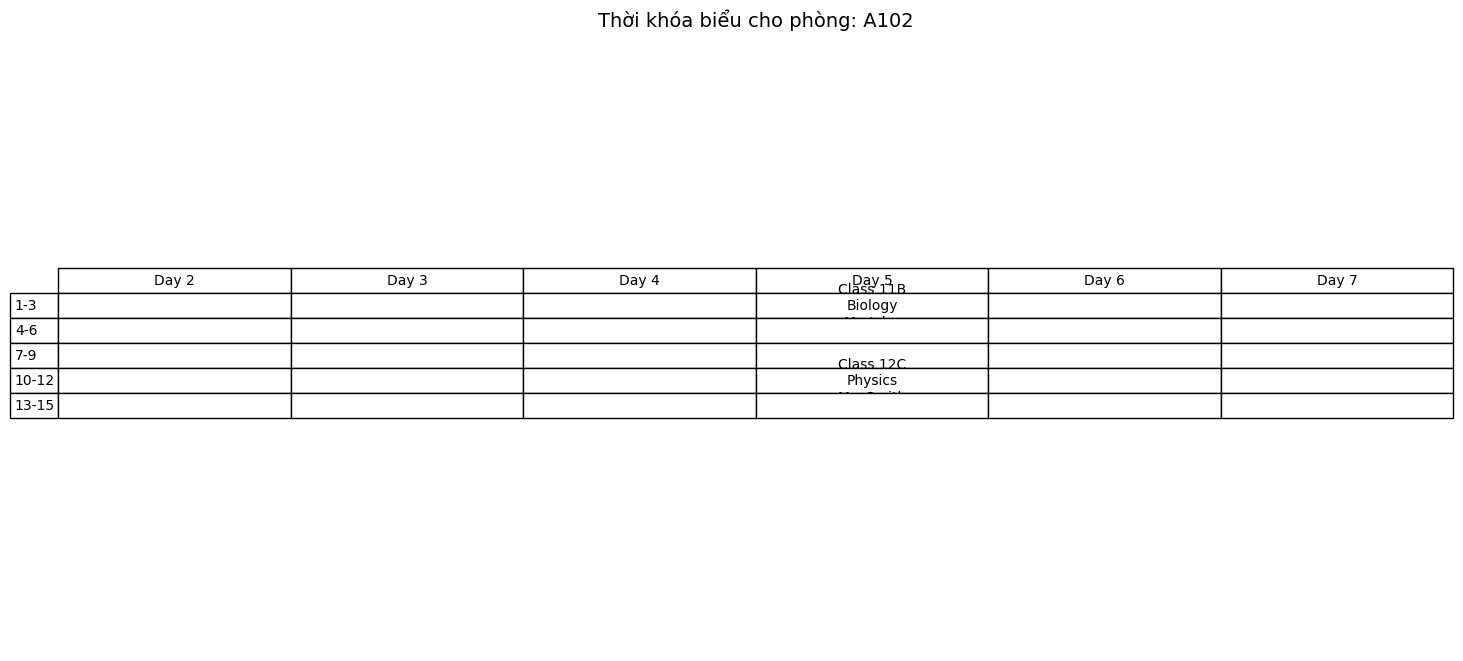

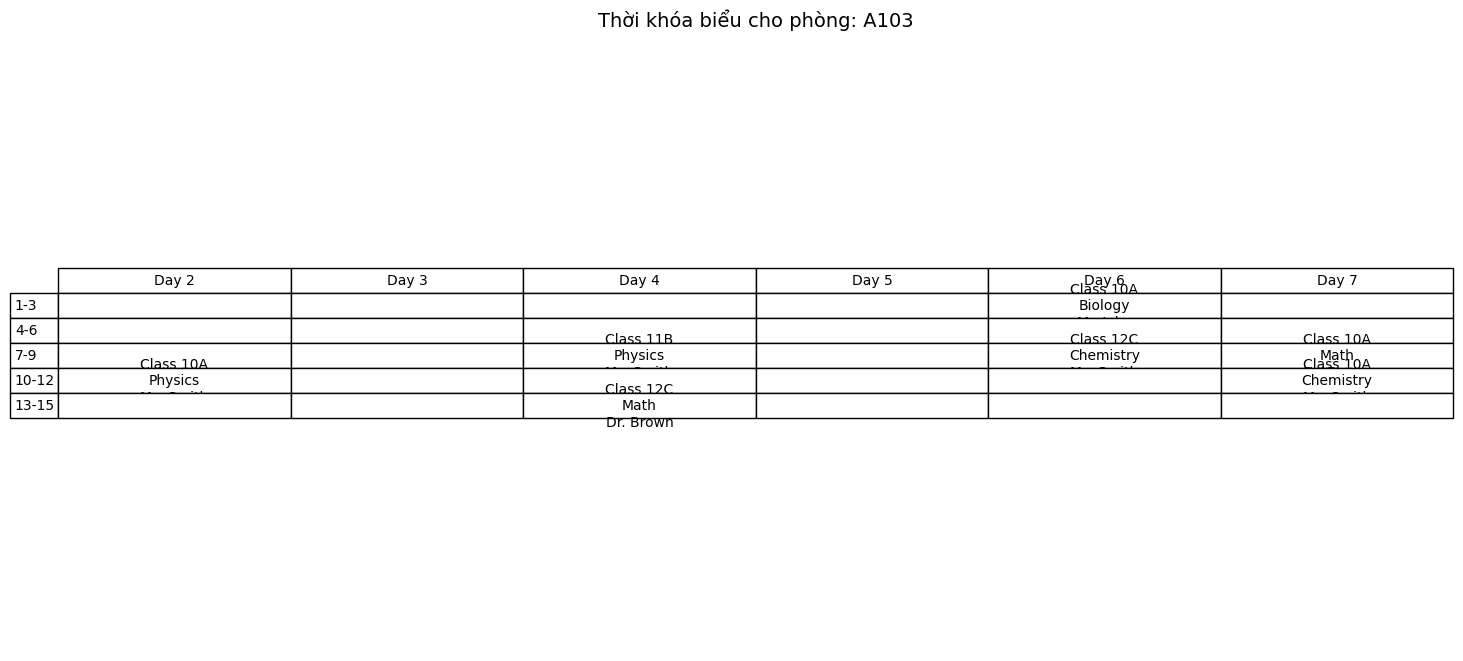

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Thông tin về dữ liệu
NUM_PERIODS = 5   # Số ca học trong ngày
NUM_DAYS = 6      # Số ngày học trong tuần (Thứ 2 - Thứ 7)
NUM_ROOMS = 3     # Số lượng phòng học
POPULATION_SIZE = 50
NUM_GENERATIONS = 100
MUTATION_RATE = 0.1

# Tạo dữ liệu mẫu
rooms = ['A101', 'A102', 'A103']
teachers = ['Mr. John', 'Ms. Smith', 'Dr. Brown']
classes = ['Class 10A', 'Class 11B', 'Class 12C']
subjects = ['Math', 'Physics', 'Chemistry', 'Biology']
time_slots = ['1-3', '4-6', '7-9', '10-12', '13-15']

# Môn học mà giảng viên có thể dạy
teacher_subjects = {
    'Mr. John': ['Math', 'Biology'],
    'Ms. Smith': ['Physics', 'Chemistry'],
    'Dr. Brown': ['Math', 'Physics']
}

# Thời gian rảnh của giảng viên (theo ca học)
teacher_free_time = {
    'Mr. John': [0, 1, 3],  # Rảnh các ca: 1-3, 4-6, 10-12
    'Ms. Smith': [2, 3, 4], # Rảnh các ca: 7-9, 10-12, 13-15
    'Dr. Brown': [0, 2, 4]  # Rảnh các ca: 1-3, 7-9, 13-15
}

# Khởi tạo ngẫu nhiên yêu cầu về môn học và giáo viên
requests = []
for cls in classes:
    for subject in subjects:
        valid_teachers = [t for t, sub in teacher_subjects.items() if subject in sub]
        if not valid_teachers:
            continue
        teacher = random.choice(valid_teachers)
        num_periods = random.randint(1, 2)  # Số ca học cần xếp (1-2 ca)
        requests.append((cls, subject, teacher, num_periods))

# Mã hóa nhiễm sắc thể
def generate_chromosome():
    chromosome = np.full((NUM_PERIODS, NUM_DAYS, NUM_ROOMS), None)
    for req in requests:
        cls, subject, teacher, num_periods = req
        periods_assigned = 0
        while periods_assigned < num_periods:
            day = random.randint(0, NUM_DAYS - 1)
            period = random.randint(0, NUM_PERIODS - 1)
            room = random.randint(0, NUM_ROOMS - 1)
            if chromosome[period, day, room] is None:
                # Kiểm tra thời gian rảnh của giảng viên
                if period not in teacher_free_time[teacher]:
                    continue
                chromosome[period, day, room] = (cls, subject, teacher)
                periods_assigned += 1
    return chromosome

# Khởi tạo quần thể
population = [generate_chromosome() for _ in range(POPULATION_SIZE)]

# Hàm fitness
def fitness(chromosome):
    violations = 0
    for period in range(NUM_PERIODS):
        for day in range(NUM_DAYS):
            teacher_set = set()
            class_set = set()
            for room in range(NUM_ROOMS):
                entry = chromosome[period, day, room]
                if entry:
                    cls, subject, teacher = entry
                    if subject not in teacher_subjects.get(teacher, []):
                        violations += 10
                    if teacher in teacher_set:
                        violations += 5
                    teacher_set.add(teacher)
                    if cls in class_set:
                        violations += 5
                    class_set.add(cls)
    return 1 / (1 + violations)

# Vòng lặp tiến hóa
for generation in range(NUM_GENERATIONS):
    population = sorted(population, key=lambda x: fitness(x), reverse=True)
    new_population = population[:POPULATION_SIZE // 2]

    while len(new_population) < POPULATION_SIZE:
        parent1, parent2 = random.choices(new_population, k=2)
        child = parent1.copy()
        for period in range(NUM_PERIODS):
            for day in range(NUM_DAYS):
                if random.random() < 0.5:
                    child[period, day] = parent2[period, day]
        if random.random() < MUTATION_RATE:
            period = random.randint(0, NUM_PERIODS - 1)
            day = random.randint(0, NUM_DAYS - 1)
            room = random.randint(0, NUM_ROOMS - 1)
            request = random.choice(requests)
            cls, subject, teacher, _ = request
            child[period, day, room] = (cls, subject, teacher)
        new_population.append(child)

    population = new_population

# Kết quả tốt nhất
best_schedule = max(population, key=fitness)

# Hiển thị thời khóa biểu
schedule_data = []
for period in range(NUM_PERIODS):
    for day in range(NUM_DAYS):
        for room in range(NUM_ROOMS):
            entry = best_schedule[period, day, room]
            if entry:
                cls, subject, teacher = entry
                schedule_data.append({
                    "Period": time_slots[period],
                    "Day": day + 2,
                    "Room": rooms[room],
                    "Class": cls,
                    "Subject": subject,
                    "Teacher": teacher
                })

# Tạo DataFrame
df_schedule = pd.DataFrame(schedule_data)

# Visualization
for room in rooms:
    room_schedule = df_schedule[df_schedule["Room"] == room]
    timetable = pd.DataFrame(index=time_slots, columns=[f"Day {i}" for i in range(2, 8)])

    for _, row in room_schedule.iterrows():
        period = row["Period"]
        day = f"Day {row['Day']}"
        info = f"{row['Class']}\n{row['Subject']}\n{row['Teacher']}"
        timetable.loc[period, day] = info

    timetable.fillna("", inplace=True)

    # Plotting the timetable
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=timetable.values, colLabels=timetable.columns,
                     rowLabels=timetable.index, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.5, 1.5)

    plt.title(f"Thời khóa biểu cho phòng: {room}", fontsize=14)
    plt.show()

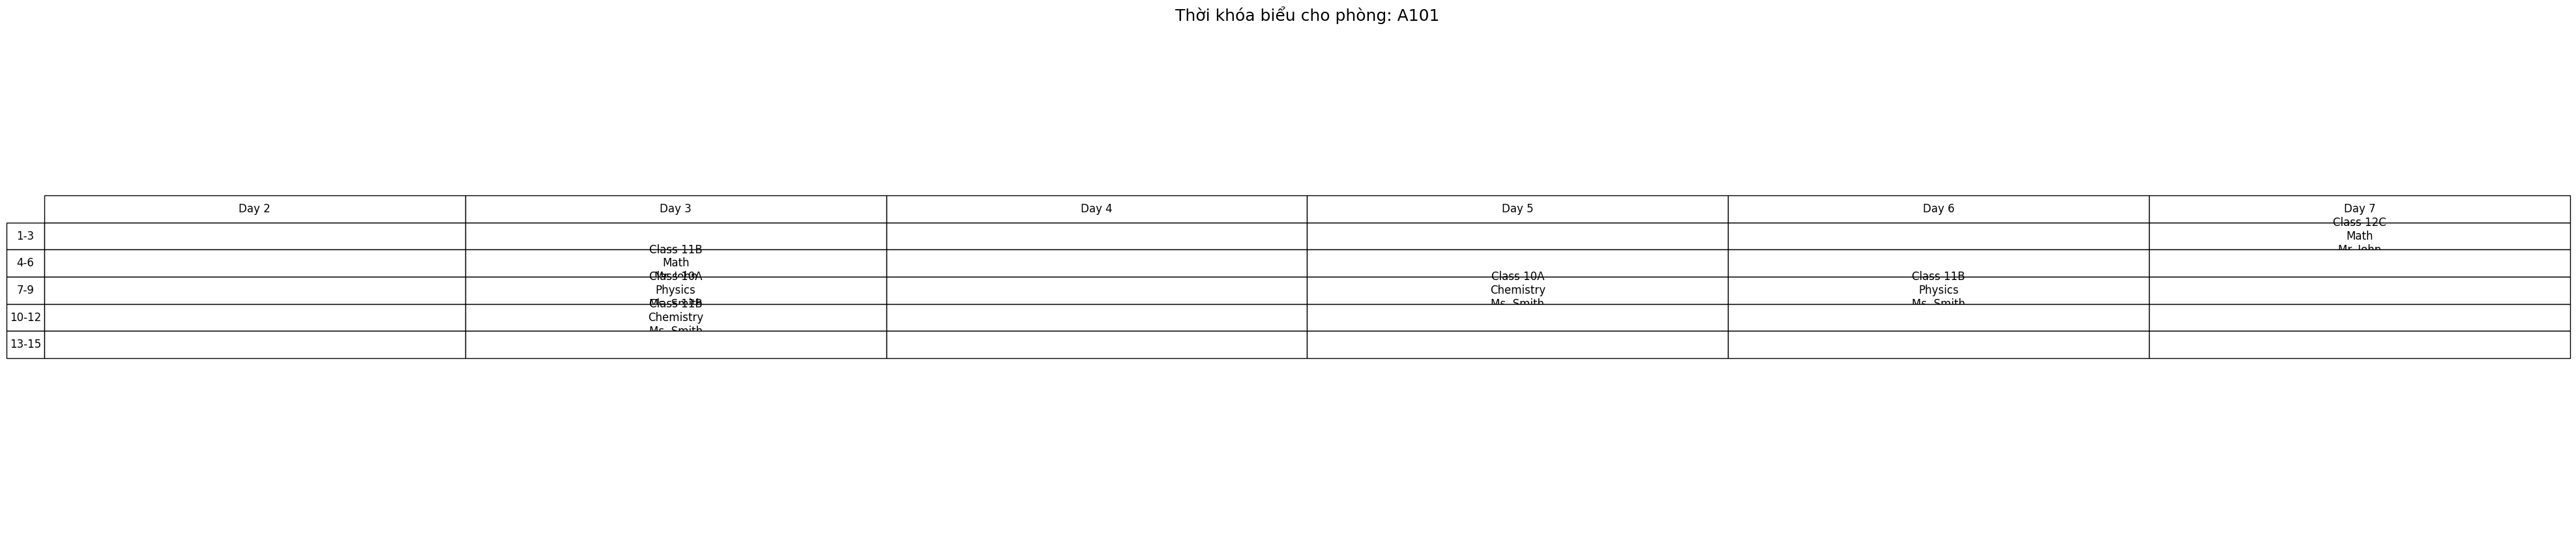

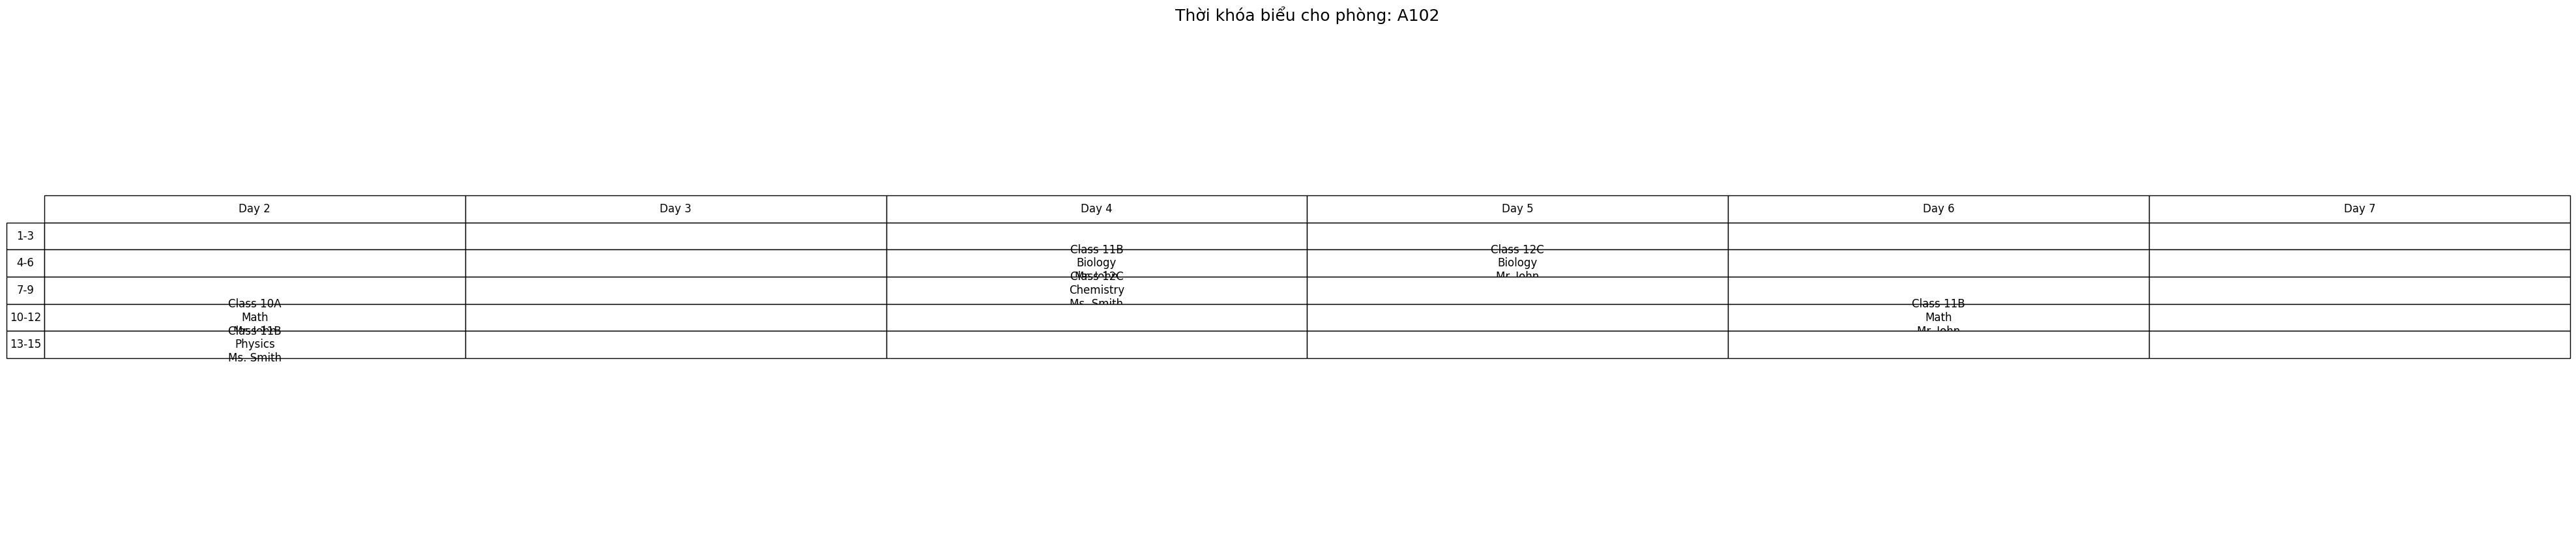

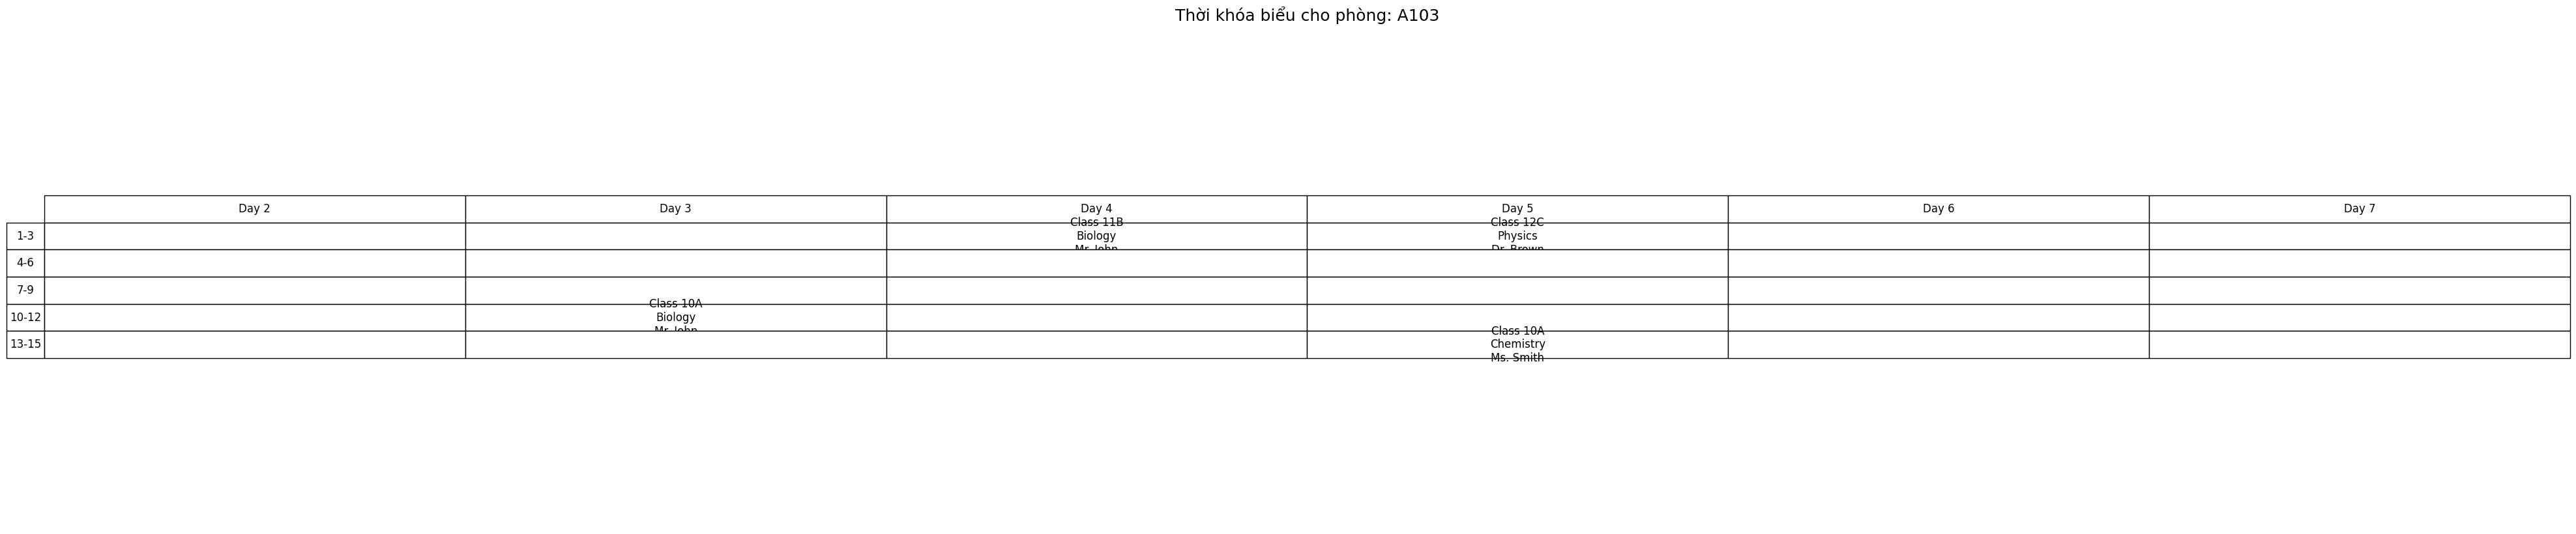

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Thông tin về dữ liệu
NUM_PERIODS = 5   # Số ca học trong ngày
NUM_DAYS = 6      # Số ngày học trong tuần (Thứ 2 - Thứ 7)
NUM_ROOMS = 3     # Số lượng phòng học
POPULATION_SIZE = 50
NUM_GENERATIONS = 100
MUTATION_RATE = 0.1

# Tạo dữ liệu mẫu
rooms = ['A101', 'A102', 'A103']
teachers = ['Mr. John', 'Ms. Smith', 'Dr. Brown']
classes = ['Class 10A', 'Class 11B', 'Class 12C']
subjects = ['Math', 'Physics', 'Chemistry', 'Biology']
time_slots = ['1-3', '4-6', '7-9', '10-12', '13-15']

# Môn học mà giảng viên có thể dạy
teacher_subjects = {
    'Mr. John': ['Math', 'Biology'],
    'Ms. Smith': ['Physics', 'Chemistry'],
    'Dr. Brown': ['Math', 'Physics']
}

# Thời gian rảnh của giảng viên
teacher_free_time = {
    'Mr. John': [0, 1, 3],
    'Ms. Smith': [2, 3, 4],
    'Dr. Brown': [0, 2, 4]
}

# Khởi tạo ngẫu nhiên yêu cầu về môn học và giáo viên
requests = []
for cls in classes:
    for subject in subjects:
        valid_teachers = [t for t, sub in teacher_subjects.items() if subject in sub]
        if not valid_teachers:
            continue
        teacher = random.choice(valid_teachers)
        num_periods = random.randint(1, 2)
        requests.append((cls, subject, teacher, num_periods))

# Mã hóa nhiễm sắc thể
def generate_chromosome():
    chromosome = np.full((NUM_PERIODS, NUM_DAYS, NUM_ROOMS), None)
    for req in requests:
        cls, subject, teacher, num_periods = req
        periods_assigned = 0
        while periods_assigned < num_periods:
            day = random.randint(0, NUM_DAYS - 1)
            period = random.randint(0, NUM_PERIODS - 1)
            room = random.randint(0, NUM_ROOMS - 1)
            if chromosome[period, day, room] is None:
                if period not in teacher_free_time[teacher]:
                    continue
                chromosome[period, day, room] = (cls, subject, teacher)
                periods_assigned += 1
    return chromosome

# Khởi tạo quần thể
population = [generate_chromosome() for _ in range(POPULATION_SIZE)]

# Hàm fitness
def fitness(chromosome):
    violations = 0
    for period in range(NUM_PERIODS):
        for day in range(NUM_DAYS):
            teacher_set = set()
            class_set = set()
            for room in range(NUM_ROOMS):
                entry = chromosome[period, day, room]
                if entry:
                    cls, subject, teacher = entry
                    if subject not in teacher_subjects.get(teacher, []):
                        violations += 10
                    if teacher in teacher_set:
                        violations += 5
                    teacher_set.add(teacher)
                    if cls in class_set:
                        violations += 5
                    class_set.add(cls)
    return 1 / (1 + violations)

# Tiến hóa
for generation in range(NUM_GENERATIONS):
    population = sorted(population, key=lambda x: fitness(x), reverse=True)
    new_population = population[:POPULATION_SIZE // 2]

    while len(new_population) < POPULATION_SIZE:
        parent1, parent2 = random.choices(new_population, k=2)
        child = parent1.copy()
        for period in range(NUM_PERIODS):
            for day in range(NUM_DAYS):
                if random.random() < 0.5:
                    child[period, day] = parent2[period, day]
        if random.random() < MUTATION_RATE:
            period = random.randint(0, NUM_PERIODS - 1)
            day = random.randint(0, NUM_DAYS - 1)
            room = random.randint(0, NUM_ROOMS - 1)
            request = random.choice(requests)
            cls, subject, teacher, _ = request
            child[period, day, room] = (cls, subject, teacher)
        new_population.append(child)

    population = new_population

# Kết quả tốt nhất
best_schedule = max(population, key=fitness)

# Hiển thị thời khóa biểu
schedule_data = []
for period in range(NUM_PERIODS):
    for day in range(NUM_DAYS):
        for room in range(NUM_ROOMS):
            entry = best_schedule[period, day, room]
            if entry:
                cls, subject, teacher = entry
                schedule_data.append({
                    "Period": time_slots[period],
                    "Day": day + 2,
                    "Room": rooms[room],
                    "Class": cls,
                    "Subject": subject,
                    "Teacher": teacher
                })

# Tạo DataFrame
df_schedule = pd.DataFrame(schedule_data)

# Visualization
for room in rooms:
    room_schedule = df_schedule[df_schedule["Room"] == room]
    timetable = pd.DataFrame(index=time_slots, columns=[f"Day {i}" for i in range(2, 8)])

    for _, row in room_schedule.iterrows():
        period = row["Period"]
        day = f"Day {row['Day']}"
        info = f"{row['Class']}\n{row['Subject']}\n{row['Teacher']}"
        timetable.loc[period, day] = info

    timetable.fillna("", inplace=True)

    # Plotting the timetable
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=timetable.values, colLabels=timetable.columns,
                     rowLabels=timetable.index, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(2.5, 2.5)

    # Căn chỉnh khoảng cách giữa các ô và chữ
    for (i, j), cell in table.get_celld().items():
        cell.set_text_props(ha='center', va='center', wrap=True)

    plt.title(f"Thời khóa biểu cho phòng: {room}", fontsize=18)
    plt.show()


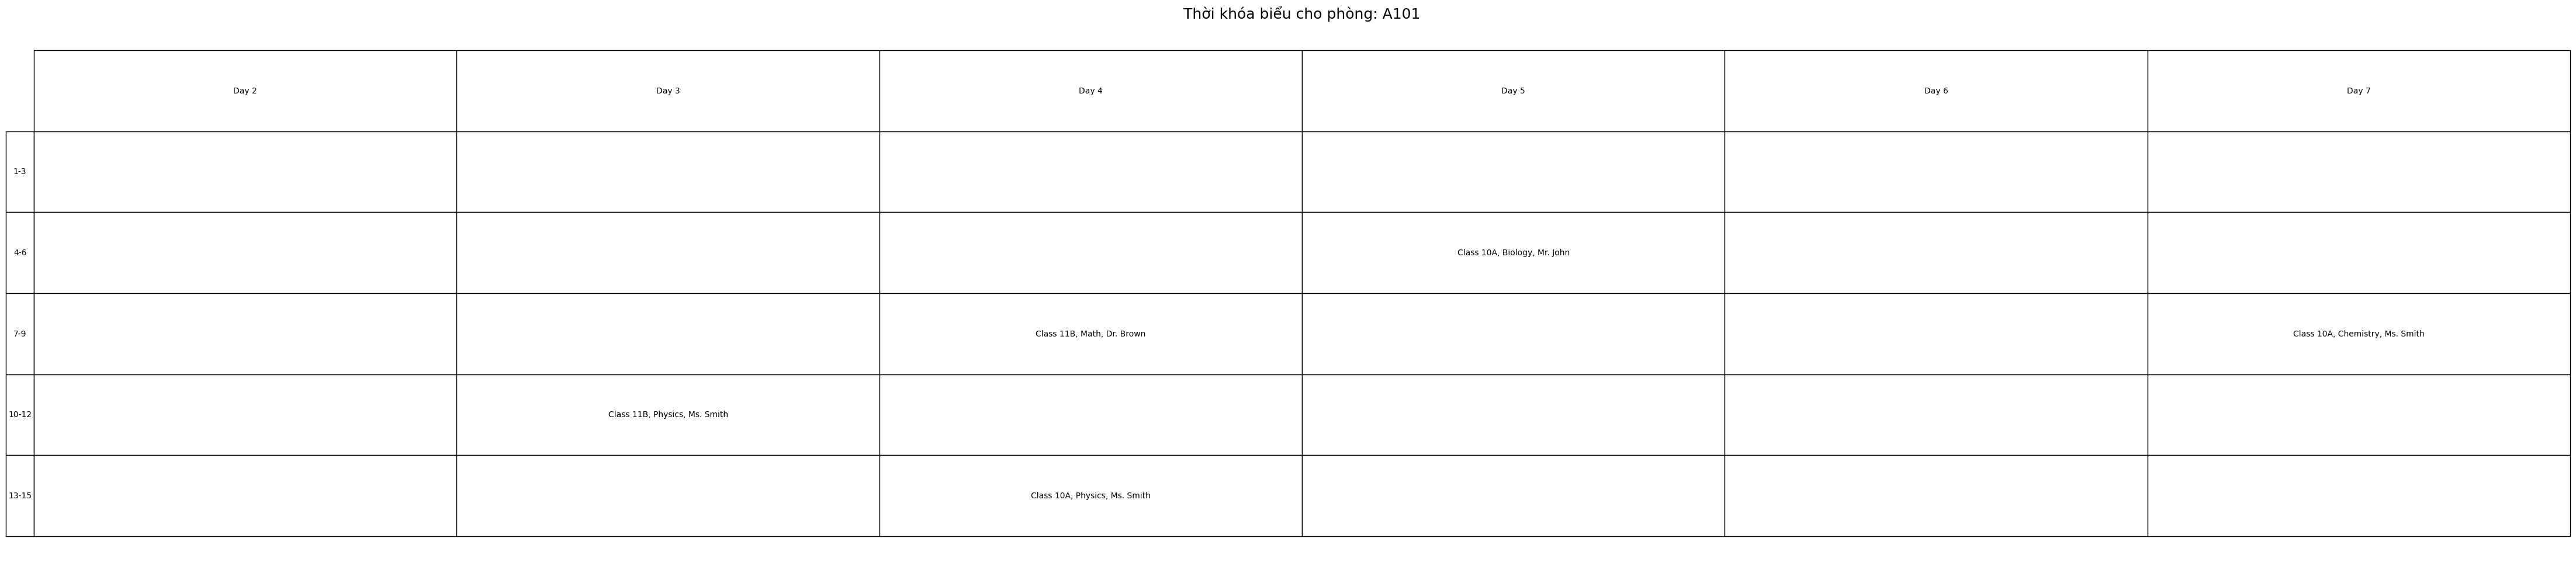

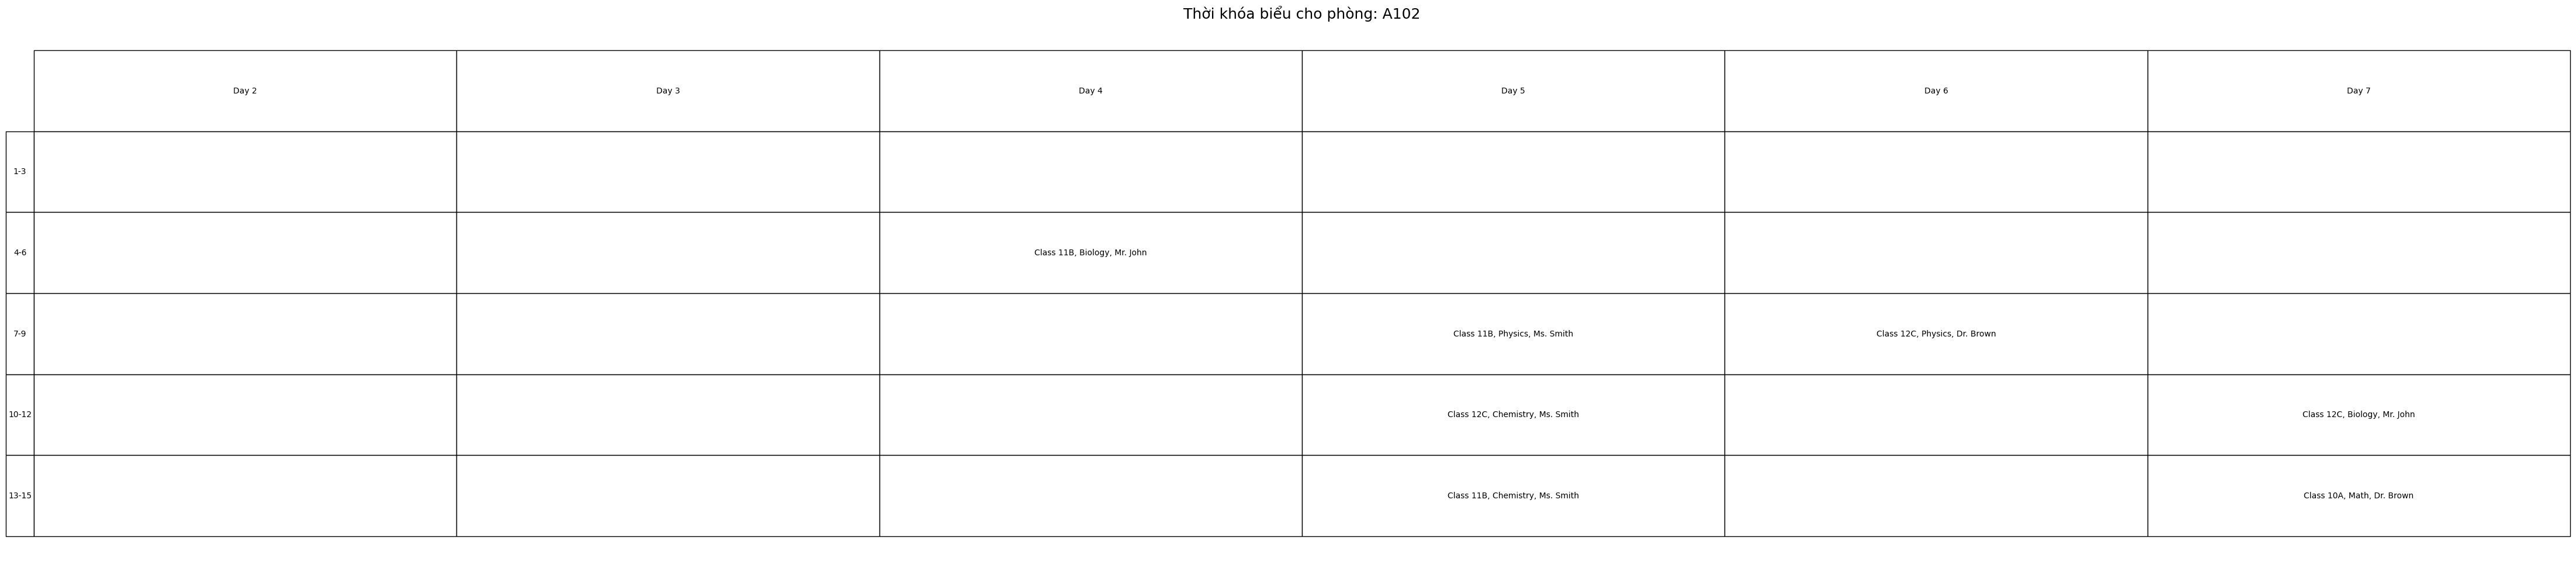

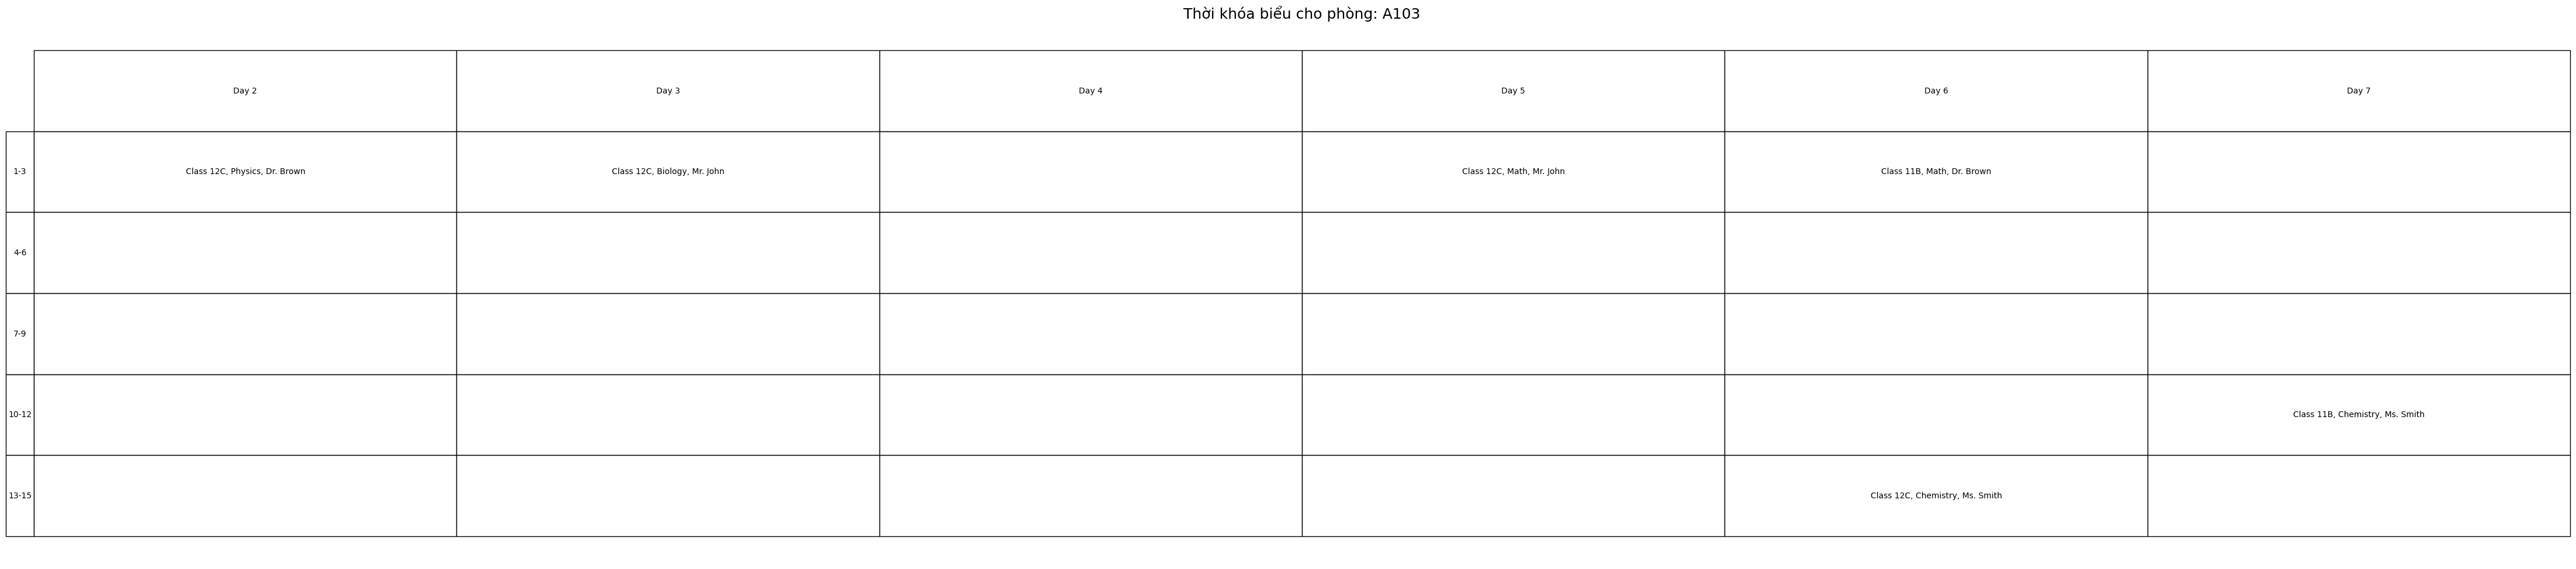

In [13]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Thông tin về dữ liệu
NUM_PERIODS = 5   # Số ca học trong ngày
NUM_DAYS = 6      # Số ngày học trong tuần (Thứ 2 - Thứ 7)
NUM_ROOMS = 3   # Số lượng phòng học
POPULATION_SIZE = 50
NUM_GENERATIONS = 1000
MUTATION_RATE = 0.1

# Tạo dữ liệu mẫu
# rooms = ['A101']
rooms = ['A101', 'A102', 'A103']
teachers = ['Mr. John', 'Ms. Smith', 'Dr. Brown']
classes = ['Class 10A', 'Class 11B', 'Class 12C']
subjects = ['Math', 'Physics', 'Chemistry', 'Biology']
time_slots = ['1-3', '4-6', '7-9', '10-12', '13-15']

# Môn học mà giảng viên có thể dạy
teacher_subjects = {
    'Mr. John': ['Math', 'Biology'],
    'Ms. Smith': ['Physics', 'Chemistry'],
    'Dr. Brown': ['Math', 'Physics']
}

# Thời gian rảnh của giảng viên
teacher_free_time = {
    'Mr. John': [0, 1, 3],
    'Ms. Smith': [2, 3, 4],
    'Dr. Brown': [0, 2, 4]
}

# Khởi tạo ngẫu nhiên yêu cầu về môn học và giáo viên
requests = []
for cls in classes:
    for subject in subjects:
        valid_teachers = [t for t, sub in teacher_subjects.items() if subject in sub]
        if not valid_teachers:
            continue
        teacher = random.choice(valid_teachers)
        num_periods = random.randint(1, 2)
        requests.append((cls, subject, teacher, num_periods))

# Mã hóa nhiễm sắc thể
def generate_chromosome():
    chromosome = np.full((NUM_PERIODS, NUM_DAYS, NUM_ROOMS), None)
    for req in requests:
        cls, subject, teacher, num_periods = req
        periods_assigned = 0
        while periods_assigned < num_periods:
            day = random.randint(0, NUM_DAYS - 1)
            period = random.randint(0, NUM_PERIODS - 1)
            room = random.randint(0, NUM_ROOMS - 1)
            if chromosome[period, day, room] is None:
                if period not in teacher_free_time[teacher]:
                    continue
                chromosome[period, day, room] = f"{cls}, {subject}, {teacher}"
                periods_assigned += 1
    return chromosome

# Khởi tạo quần thể
population = [generate_chromosome() for _ in range(POPULATION_SIZE)]

# Hàm fitness
def fitness(chromosome):
    violations = 0
    for period in range(NUM_PERIODS):
        for day in range(NUM_DAYS):
            teacher_set = set()
            class_set = set()
            for room in range(NUM_ROOMS):
                entry = chromosome[period, day, room]
                if entry:
                    cls, subject, teacher = entry.split(", ")
                    if subject not in teacher_subjects.get(teacher, []):
                        violations += 10
                    if teacher in teacher_set:
                        violations += 5
                    teacher_set.add(teacher)
                    if cls in class_set:
                        violations += 5
                    class_set.add(cls)
    return 1 / (1 + violations)

# Tiến hóa
for generation in range(NUM_GENERATIONS):
    population = sorted(population, key=lambda x: fitness(x), reverse=True)
    new_population = population[:POPULATION_SIZE // 2]

    while len(new_population) < POPULATION_SIZE:
        parent1, parent2 = random.choices(new_population, k=2)
        child = parent1.copy()
        for period in range(NUM_PERIODS):
            for day in range(NUM_DAYS):
                if random.random() < 0.5:
                    child[period, day] = parent2[period, day]
        if random.random() < MUTATION_RATE:
            period = random.randint(0, NUM_PERIODS - 1)
            day = random.randint(0, NUM_DAYS - 1)
            room = random.randint(0, NUM_ROOMS - 1)
            request = random.choice(requests)
            cls, subject, teacher, _ = request
            child[period, day, room] = f"{cls}, {subject}, {teacher}"
        new_population.append(child)

    population = new_population

# Kết quả tốt nhất
best_schedule = max(population, key=fitness)

# Hiển thị thời khóa biểu
schedule_data = []
for period in range(NUM_PERIODS):
    for day in range(NUM_DAYS):
        for room in range(NUM_ROOMS):
            entry = best_schedule[period, day, room]
            if entry:
                cls, subject, teacher = entry.split(", ")
                schedule_data.append({
                    "Period": time_slots[period],
                    "Day": day + 2,
                    "Room": rooms[room],
                    "Class": cls,
                    "Subject": subject,
                    "Teacher": teacher
                })

# Tạo DataFrame
df_schedule = pd.DataFrame(schedule_data)

# Visualization
for room in rooms:
    room_schedule = df_schedule[df_schedule["Room"] == room]
    timetable = pd.DataFrame(index=time_slots, columns=[f"Day {i}" for i in range(2, 8)])

    for _, row in room_schedule.iterrows():
        period = row["Period"]
        day = f"Day {row['Day']}"
        info = f"{row['Class']}, {row['Subject']}, {row['Teacher']}"
        timetable.loc[period, day] = info

    timetable.fillna("", inplace=True)

    # Plotting the timetable
    fig, ax = plt.subplots(figsize=(20, 12))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=timetable.values, colLabels=timetable.columns,
                     rowLabels=timetable.index, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(2.8, 2.8)

    for (i, j), cell in table.get_celld().items():
        cell.set_text_props(ha='center', va='center', wrap=True)
        cell.set_height(0.15)  # Tăng chiều cao ô

    plt.title(f"Thời khóa biểu cho phòng: {room}", fontsize=18)
    plt.show()


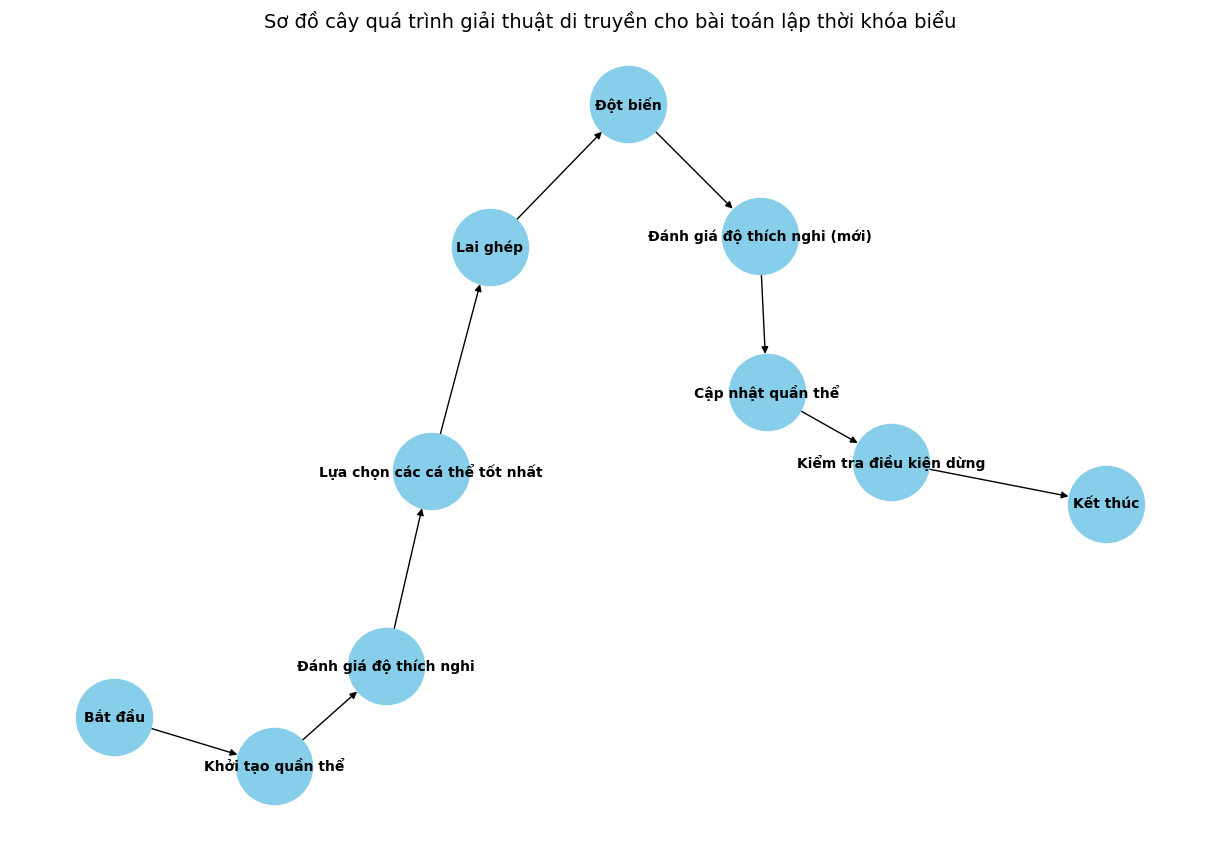

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

# Tạo đồ thị
G = nx.DiGraph()

# Các bước chính
G.add_edge("Bắt đầu", "Khởi tạo quần thể")
G.add_edge("Khởi tạo quần thể", "Đánh giá độ thích nghi")
G.add_edge("Đánh giá độ thích nghi", "Lựa chọn các cá thể tốt nhất")
G.add_edge("Lựa chọn các cá thể tốt nhất", "Lai ghép")
G.add_edge("Lai ghép", "Đột biến")
G.add_edge("Đột biến", "Đánh giá độ thích nghi (mới)")
G.add_edge("Đánh giá độ thích nghi (mới)", "Cập nhật quần thể")
G.add_edge("Cập nhật quần thể", "Kiểm tra điều kiện dừng")
G.add_edge("Kiểm tra điều kiện dừng", "Kết thúc")

# Sơ đồ cây
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
plt.title("Sơ đồ cây quá trình giải thuật di truyền cho bài toán lập thời khóa biểu", fontsize=14)
plt.show()


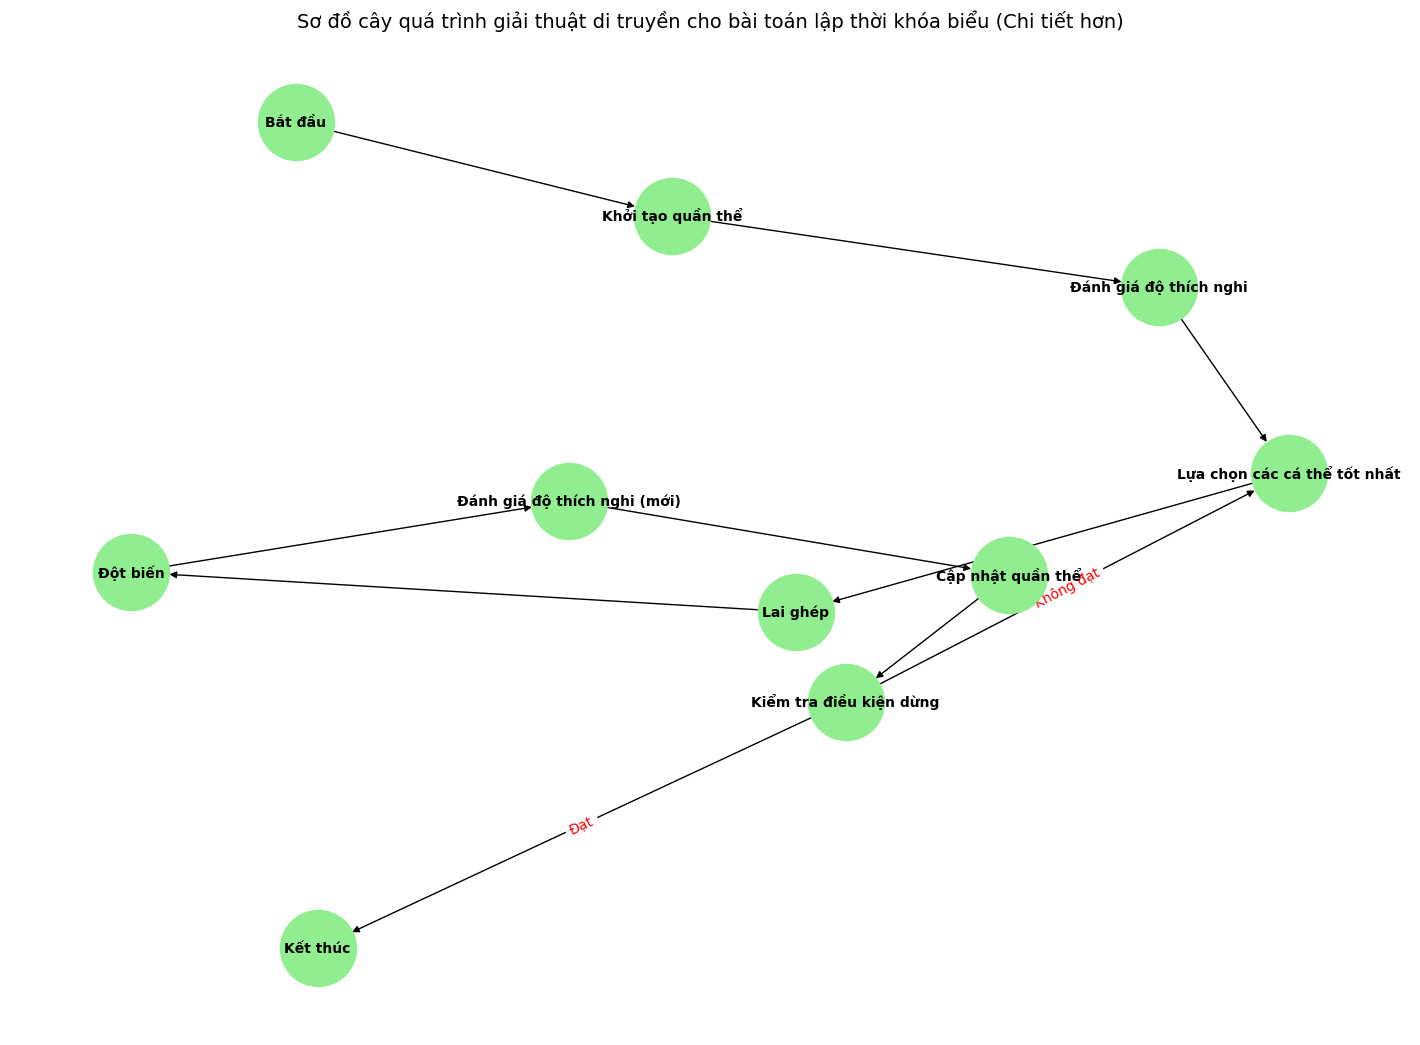

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

# Tạo đồ thị
G = nx.DiGraph()

# Thêm các bước vào đồ thị
G.add_edge("Bắt đầu", "Khởi tạo quần thể")
G.add_edge("Khởi tạo quần thể", "Đánh giá độ thích nghi")
G.add_edge("Đánh giá độ thích nghi", "Lựa chọn các cá thể tốt nhất")
G.add_edge("Lựa chọn các cá thể tốt nhất", "Lai ghép")
G.add_edge("Lai ghép", "Đột biến")
G.add_edge("Đột biến", "Đánh giá độ thích nghi (mới)")
G.add_edge("Đánh giá độ thích nghi (mới)", "Cập nhật quần thể")
G.add_edge("Cập nhật quần thể", "Kiểm tra điều kiện dừng")

# Thêm các vòng lặp và điều kiện kiểm tra
G.add_edge("Kiểm tra điều kiện dừng", "Lựa chọn các cá thể tốt nhất", label="Không đạt")
G.add_edge("Kiểm tra điều kiện dừng", "Kết thúc", label="Đạt")

# Vẽ đồ thị
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightgreen", font_size=10, font_weight="bold", arrows=True)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")

plt.title("Sơ đồ cây quá trình giải thuật di truyền cho bài toán lập thời khóa biểu (Chi tiết hơn)", fontsize=14)
plt.show()


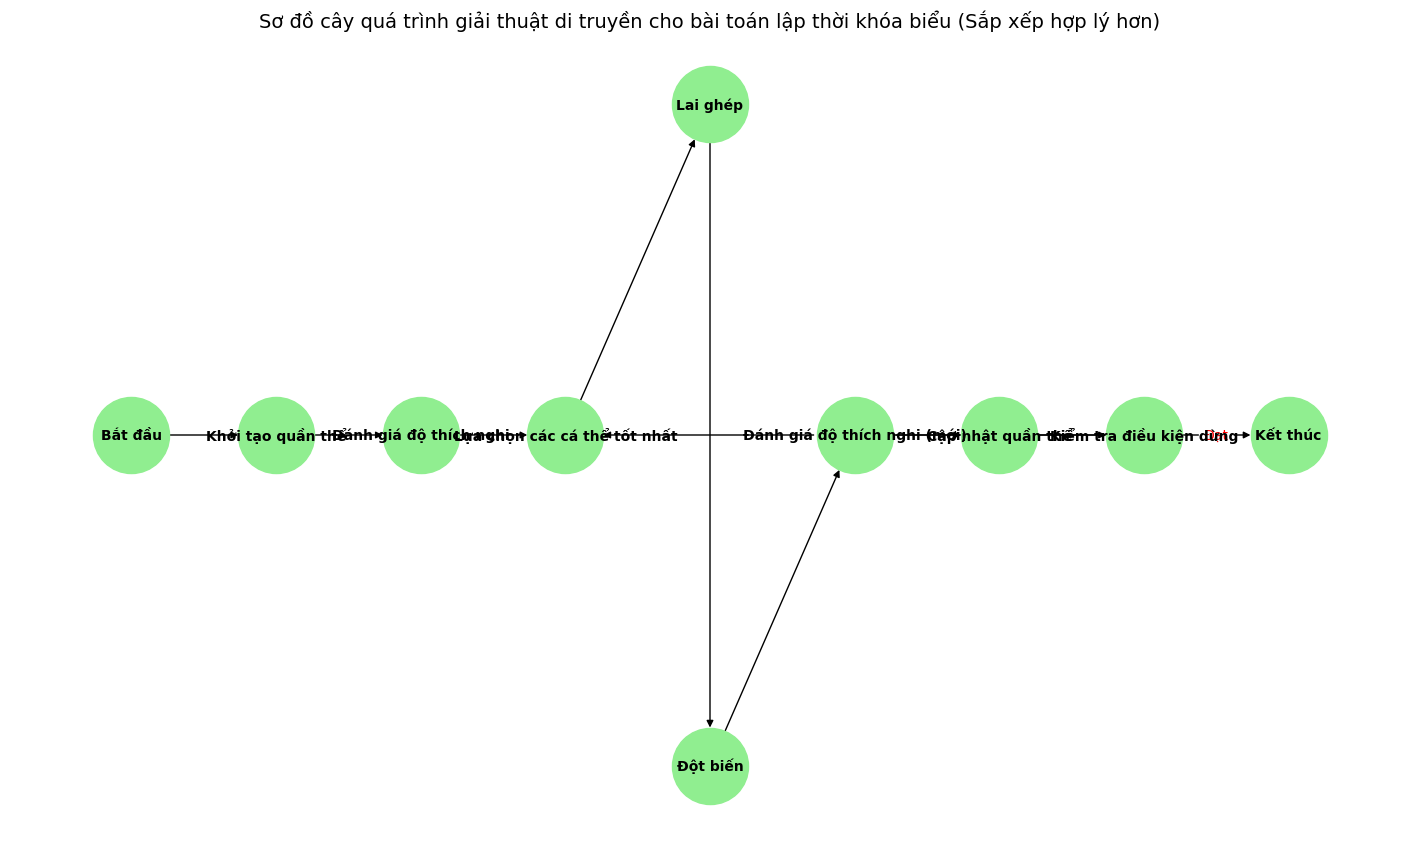

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

# Tạo đồ thị
G = nx.DiGraph()

# Thêm các bước vào đồ thị
G.add_edge("Bắt đầu", "Khởi tạo quần thể")
G.add_edge("Khởi tạo quần thể", "Đánh giá độ thích nghi")
G.add_edge("Đánh giá độ thích nghi", "Lựa chọn các cá thể tốt nhất")
G.add_edge("Lựa chọn các cá thể tốt nhất", "Lai ghép")
G.add_edge("Lai ghép", "Đột biến")
G.add_edge("Đột biến", "Đánh giá độ thích nghi (mới)")
G.add_edge("Đánh giá độ thích nghi (mới)", "Cập nhật quần thể")
G.add_edge("Cập nhật quần thể", "Kiểm tra điều kiện dừng")
G.add_edge("Kiểm tra điều kiện dừng", "Kết thúc", label="Đạt")
G.add_edge("Kiểm tra điều kiện dừng", "Lựa chọn các cá thể tốt nhất", label="Không đạt")

# Thiết lập vị trí các node thủ công
pos = {
    "Bắt đầu": (0, 0),
    "Khởi tạo quần thể": (1, 0),
    "Đánh giá độ thích nghi": (2, 0),
    "Lựa chọn các cá thể tốt nhất": (3, 0),
    "Lai ghép": (4, 0.5),
    "Đột biến": (4, -0.5),
    "Đánh giá độ thích nghi (mới)": (5, 0),
    "Cập nhật quần thể": (6, 0),
    "Kiểm tra điều kiện dừng": (7, 0),
    "Kết thúc": (8, 0)
}

# Vẽ đồ thị
plt.figure(figsize=(14, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightgreen", font_size=10, font_weight="bold", arrows=True)

# Vẽ nhãn cho các cạnh
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")

# Tiêu đề
plt.title("Sơ đồ cây quá trình giải thuật di truyền cho bài toán lập thời khóa biểu (Sắp xếp hợp lý hơn)", fontsize=14)
plt.show()


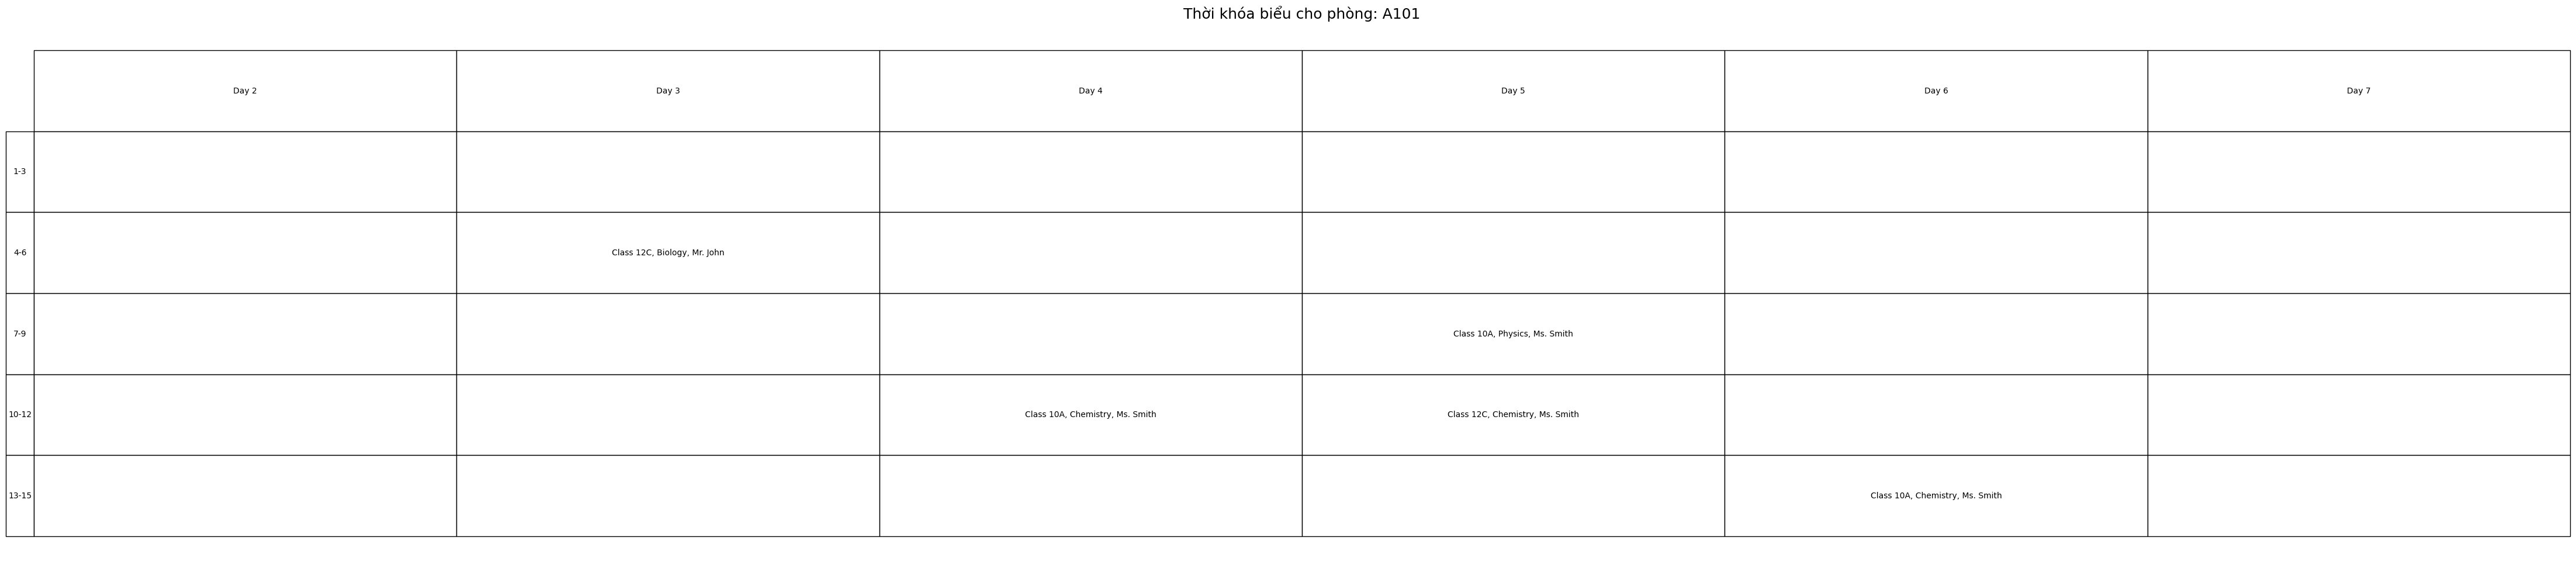

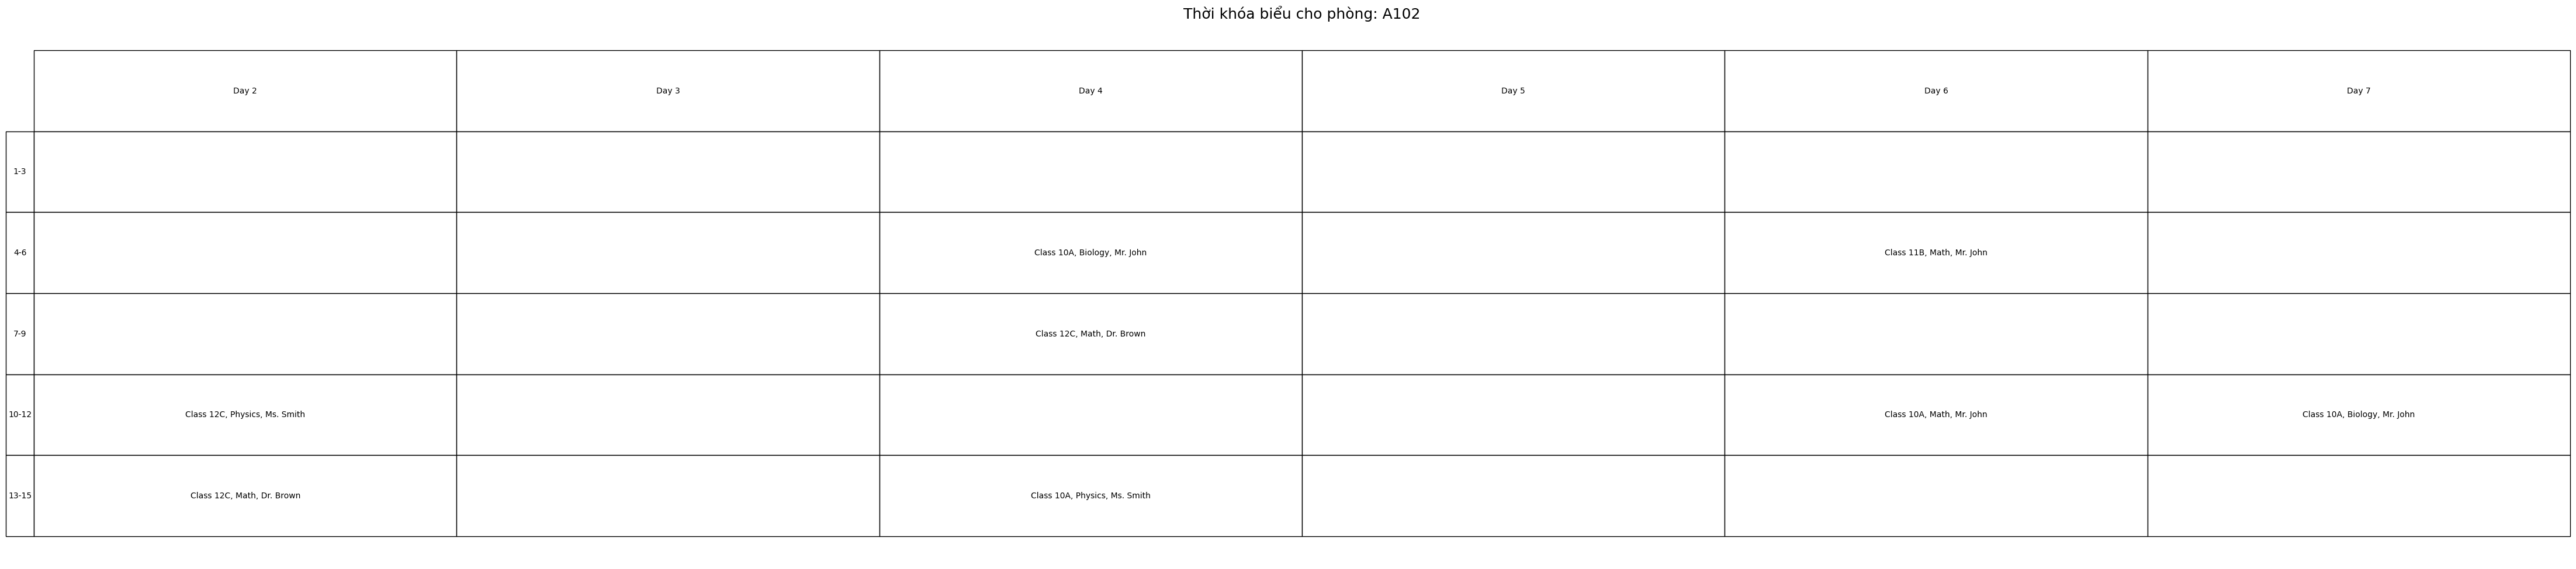

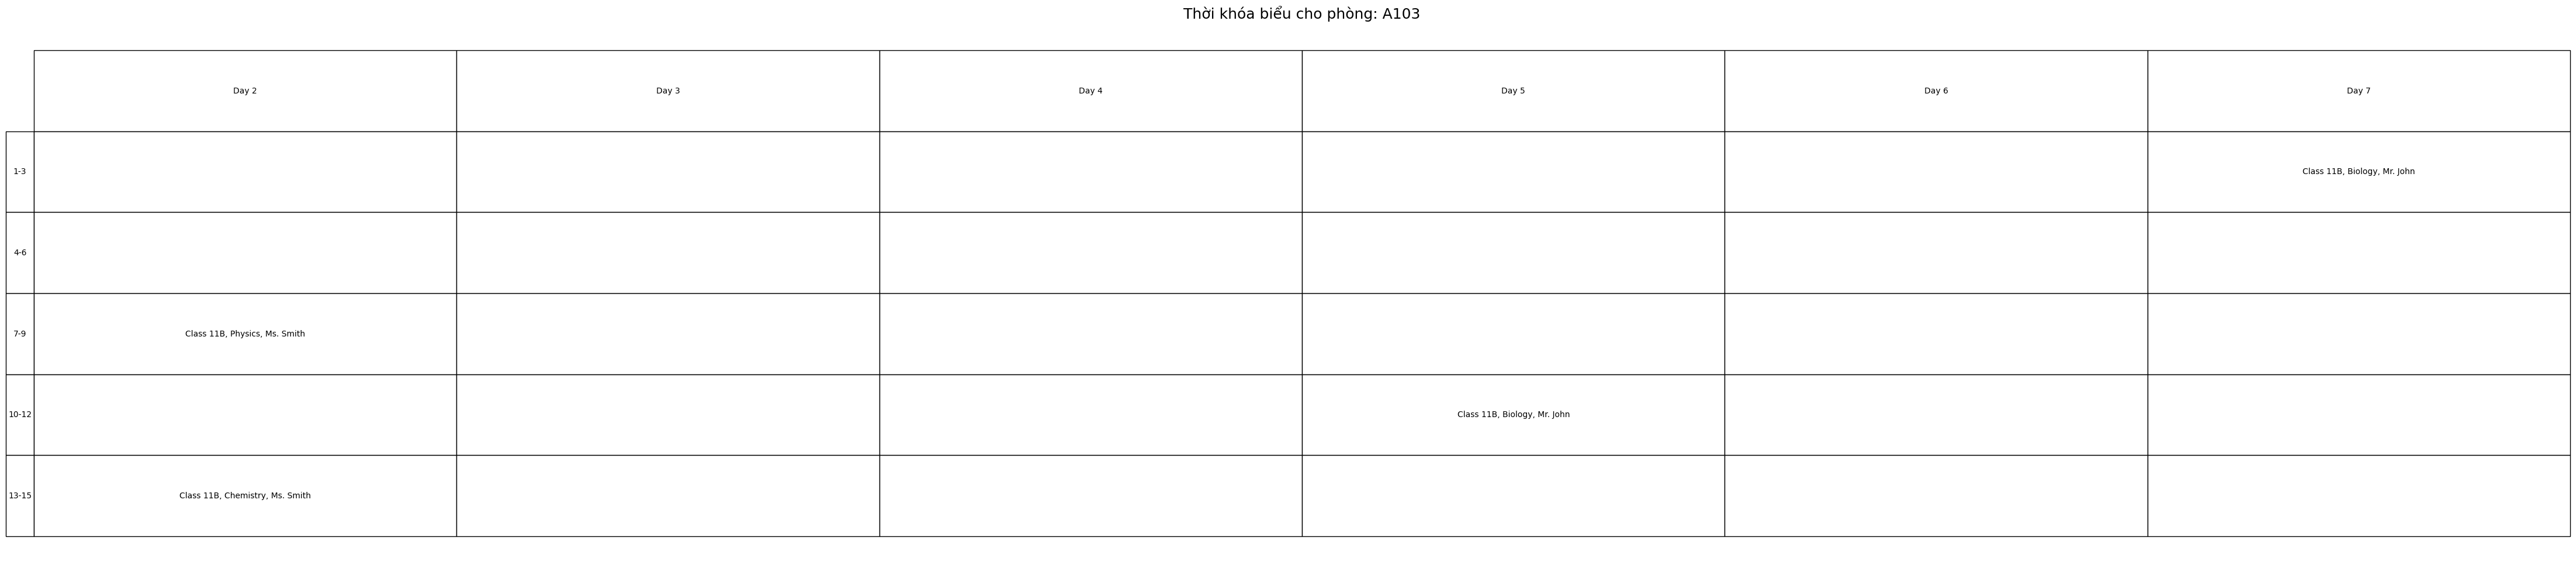

In [15]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Thông tin về dữ liệu
NUM_PERIODS = 5   # Số ca học trong ngày
NUM_DAYS = 6      # Số ngày học trong tuần (Thứ 2 - Thứ 7)
NUM_ROOMS = 3   # Số lượng phòng học
POPULATION_SIZE = 50
NUM_GENERATIONS = 10000
MUTATION_RATE = 0.1

# Tạo dữ liệu mẫu
# rooms = ['A101']
rooms = ['A101', 'A102', 'A103']
teachers = ['Mr. John', 'Ms. Smith', 'Dr. Brown']
classes = ['Class 10A', 'Class 11B', 'Class 12C']
subjects = ['Math', 'Physics', 'Chemistry', 'Biology']
time_slots = ['1-3', '4-6', '7-9', '10-12', '13-15']

# Môn học mà giảng viên có thể dạy
teacher_subjects = {
    'Mr. John': ['Math', 'Biology'],
    'Ms. Smith': ['Physics', 'Chemistry'],
    'Dr. Brown': ['Math', 'Physics']
}

# Thời gian rảnh của giảng viên
teacher_free_time = {
    'Mr. John': [0, 1, 3],
    'Ms. Smith': [2, 3, 4],
    'Dr. Brown': [0, 2, 4]
}

# Khởi tạo ngẫu nhiên yêu cầu về môn học và giáo viên
requests = []
for cls in classes:
    for subject in subjects:
        valid_teachers = [t for t, sub in teacher_subjects.items() if subject in sub]
        if not valid_teachers:
            continue
        teacher = random.choice(valid_teachers)
        num_periods = random.randint(1, 2)
        requests.append((cls, subject, teacher, num_periods))

# Mã hóa nhiễm sắc thể
def generate_chromosome():
    chromosome = np.full((NUM_PERIODS, NUM_DAYS, NUM_ROOMS), None)
    for req in requests:
        cls, subject, teacher, num_periods = req
        periods_assigned = 0
        while periods_assigned < num_periods:
            day = random.randint(0, NUM_DAYS - 1)
            period = random.randint(0, NUM_PERIODS - 1)
            room = random.randint(0, NUM_ROOMS - 1)
            if chromosome[period, day, room] is None:
                if period not in teacher_free_time[teacher]:
                    continue
                chromosome[period, day, room] = f"{cls}, {subject}, {teacher}"
                periods_assigned += 1
    return chromosome

# Khởi tạo quần thể
population = [generate_chromosome() for _ in range(POPULATION_SIZE)]

# Hàm fitness
def fitness(chromosome):
    violations = 0
    for period in range(NUM_PERIODS):
        for day in range(NUM_DAYS):
            teacher_set = set()
            class_set = set()
            for room in range(NUM_ROOMS):
                entry = chromosome[period, day, room]
                if entry:
                    cls, subject, teacher = entry.split(", ")
                    if subject not in teacher_subjects.get(teacher, []):
                        violations += 10
                    if teacher in teacher_set:
                        violations += 5
                    if period not in teacher_free_time[teacher]:
                        violations += 8 
                    teacher_set.add(teacher)
                    if cls in class_set:
                        violations += 5
                    class_set.add(cls)
    return 1 / (1 + violations)

# Tiến hóa
for generation in range(NUM_GENERATIONS):
    population = sorted(population, key=lambda x: fitness(x), reverse=True)
    new_population = population[:POPULATION_SIZE // 2]

    while len(new_population) < POPULATION_SIZE:
        parent1, parent2 = random.choices(new_population, k=2)
        child = parent1.copy()
        for period in range(NUM_PERIODS):
            for day in range(NUM_DAYS):
                if random.random() < 0.5:
                    child[period, day] = parent2[period, day]
        if random.random() < MUTATION_RATE:
            period = random.randint(0, NUM_PERIODS - 1)
            day = random.randint(0, NUM_DAYS - 1)
            room = random.randint(0, NUM_ROOMS - 1)
            request = random.choice(requests)
            cls, subject, teacher, _ = request
            child[period, day, room] = f"{cls}, {subject}, {teacher}"
        new_population.append(child)

    population = new_population

# Kết quả tốt nhất
best_schedule = max(population, key=fitness)

# Hiển thị thời khóa biểu
schedule_data = []
for period in range(NUM_PERIODS):
    for day in range(NUM_DAYS):
        for room in range(NUM_ROOMS):
            entry = best_schedule[period, day, room]
            if entry:
                cls, subject, teacher = entry.split(", ")
                schedule_data.append({
                    "Period": time_slots[period],
                    "Day": day + 2,
                    "Room": rooms[room],
                    "Class": cls,
                    "Subject": subject,
                    "Teacher": teacher
                })

# Tạo DataFrame
df_schedule = pd.DataFrame(schedule_data)

# Visualization
for room in rooms:
    room_schedule = df_schedule[df_schedule["Room"] == room]
    timetable = pd.DataFrame(index=time_slots, columns=[f"Day {i}" for i in range(2, 8)])

    for _, row in room_schedule.iterrows():
        period = row["Period"]
        day = f"Day {row['Day']}"
        info = f"{row['Class']}, {row['Subject']}, {row['Teacher']}"
        timetable.loc[period, day] = info

    timetable.fillna("", inplace=True)

    # Plotting the timetable
    fig, ax = plt.subplots(figsize=(20, 12))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=timetable.values, colLabels=timetable.columns,
                     rowLabels=timetable.index, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(2.8, 2.8)

    for (i, j), cell in table.get_celld().items():
        cell.set_text_props(ha='center', va='center', wrap=True)
        cell.set_height(0.15)  # Tăng chiều cao ô

    plt.title(f"Thời khóa biểu cho phòng: {room}", fontsize=18)
    plt.show()


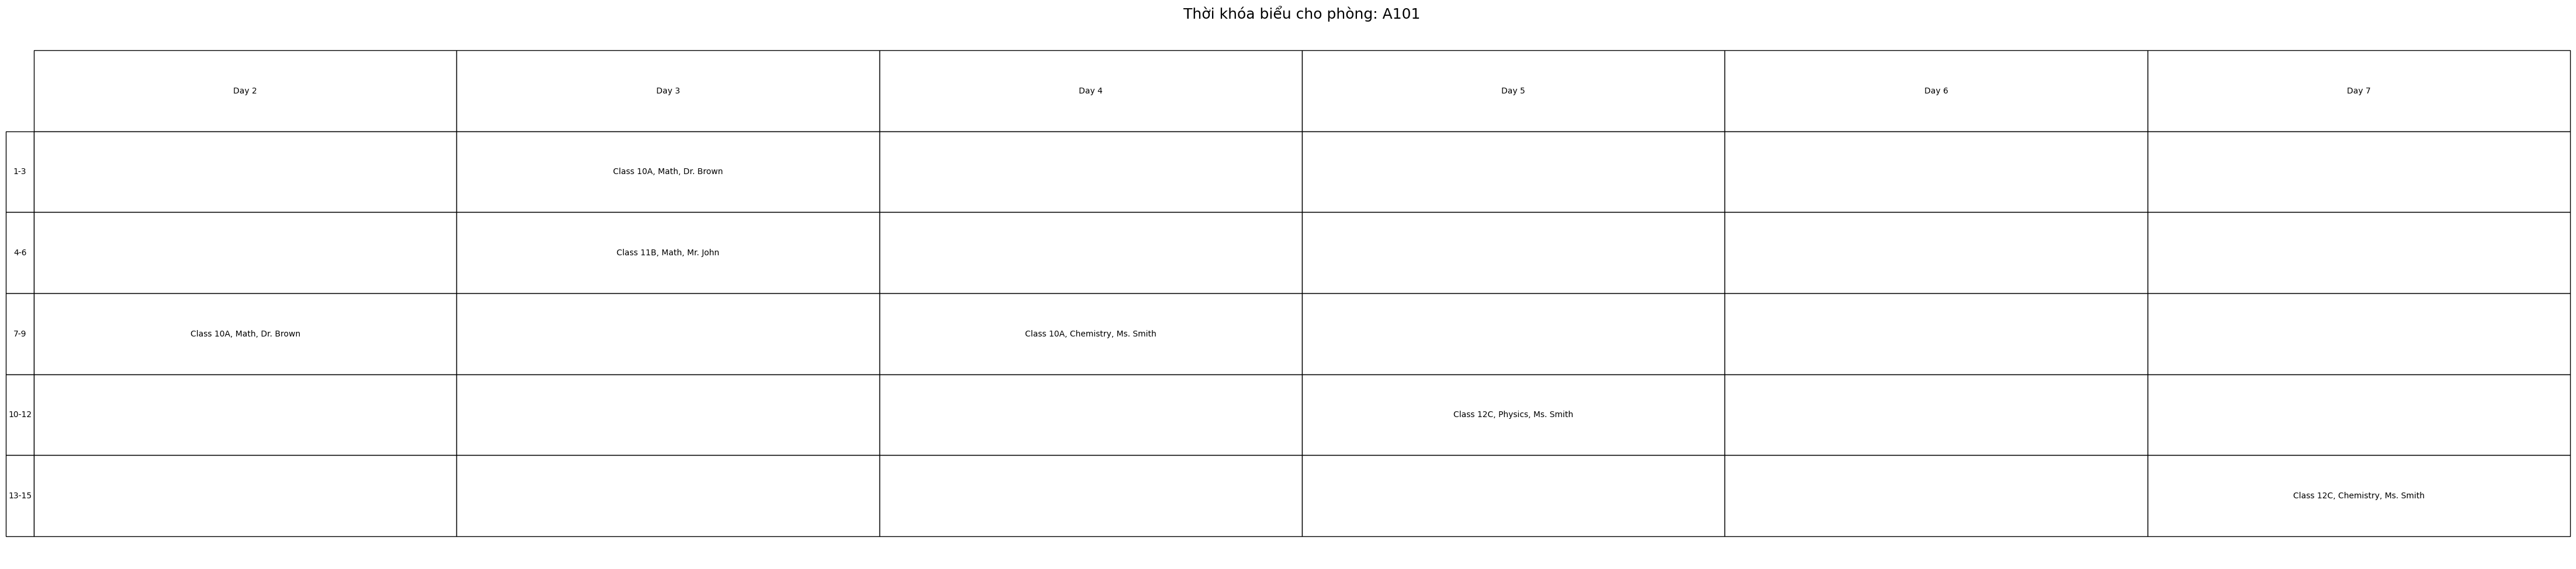

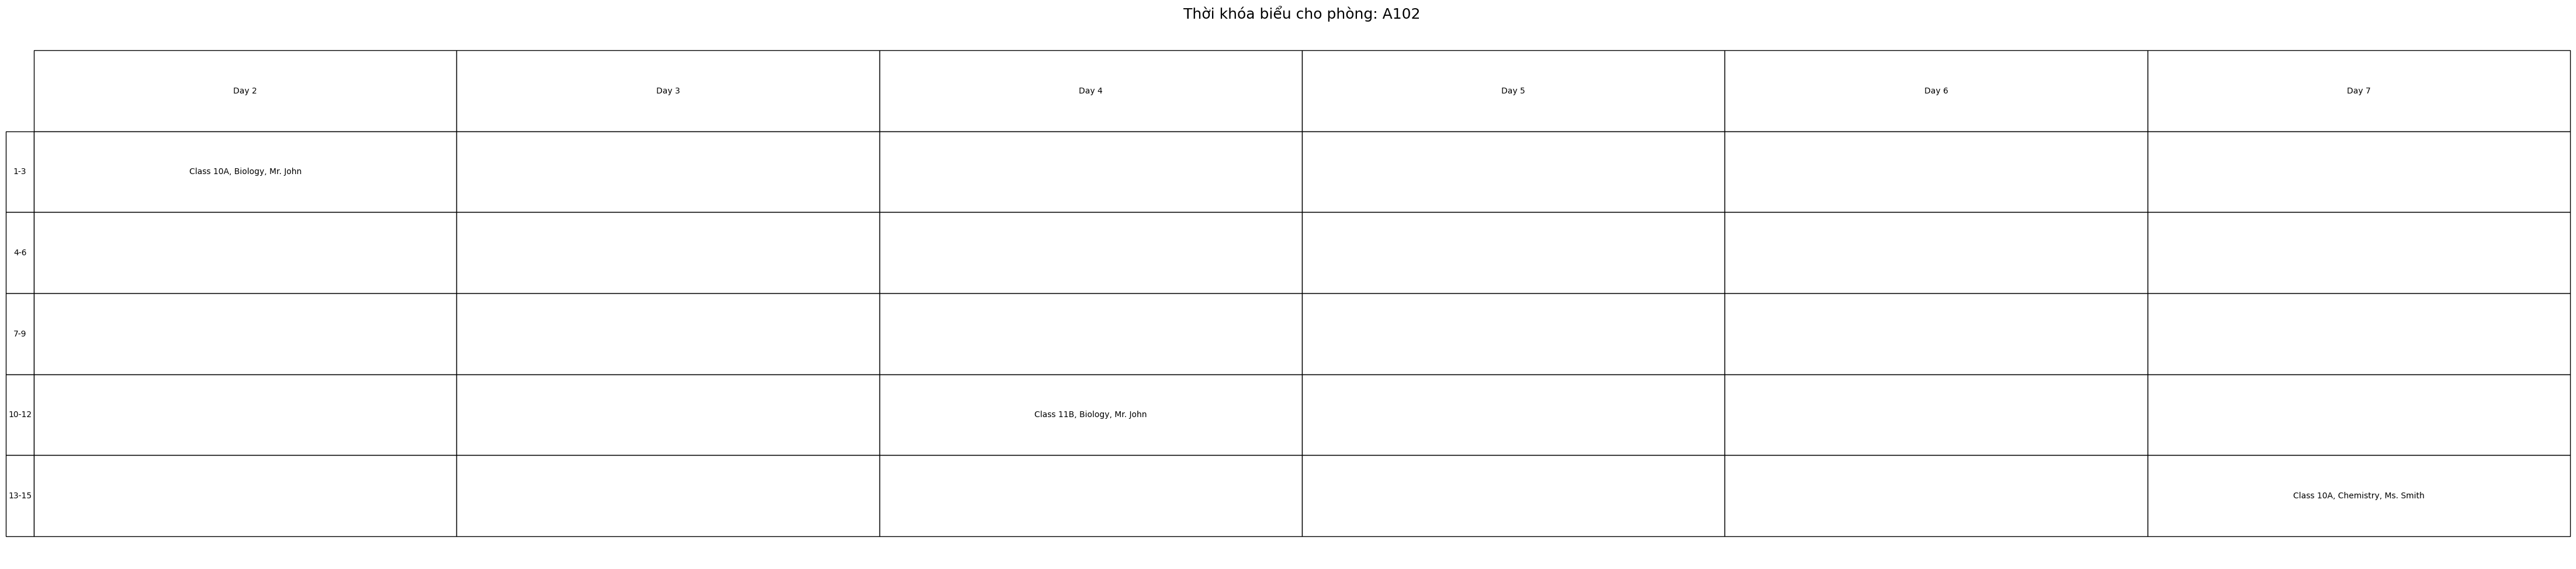

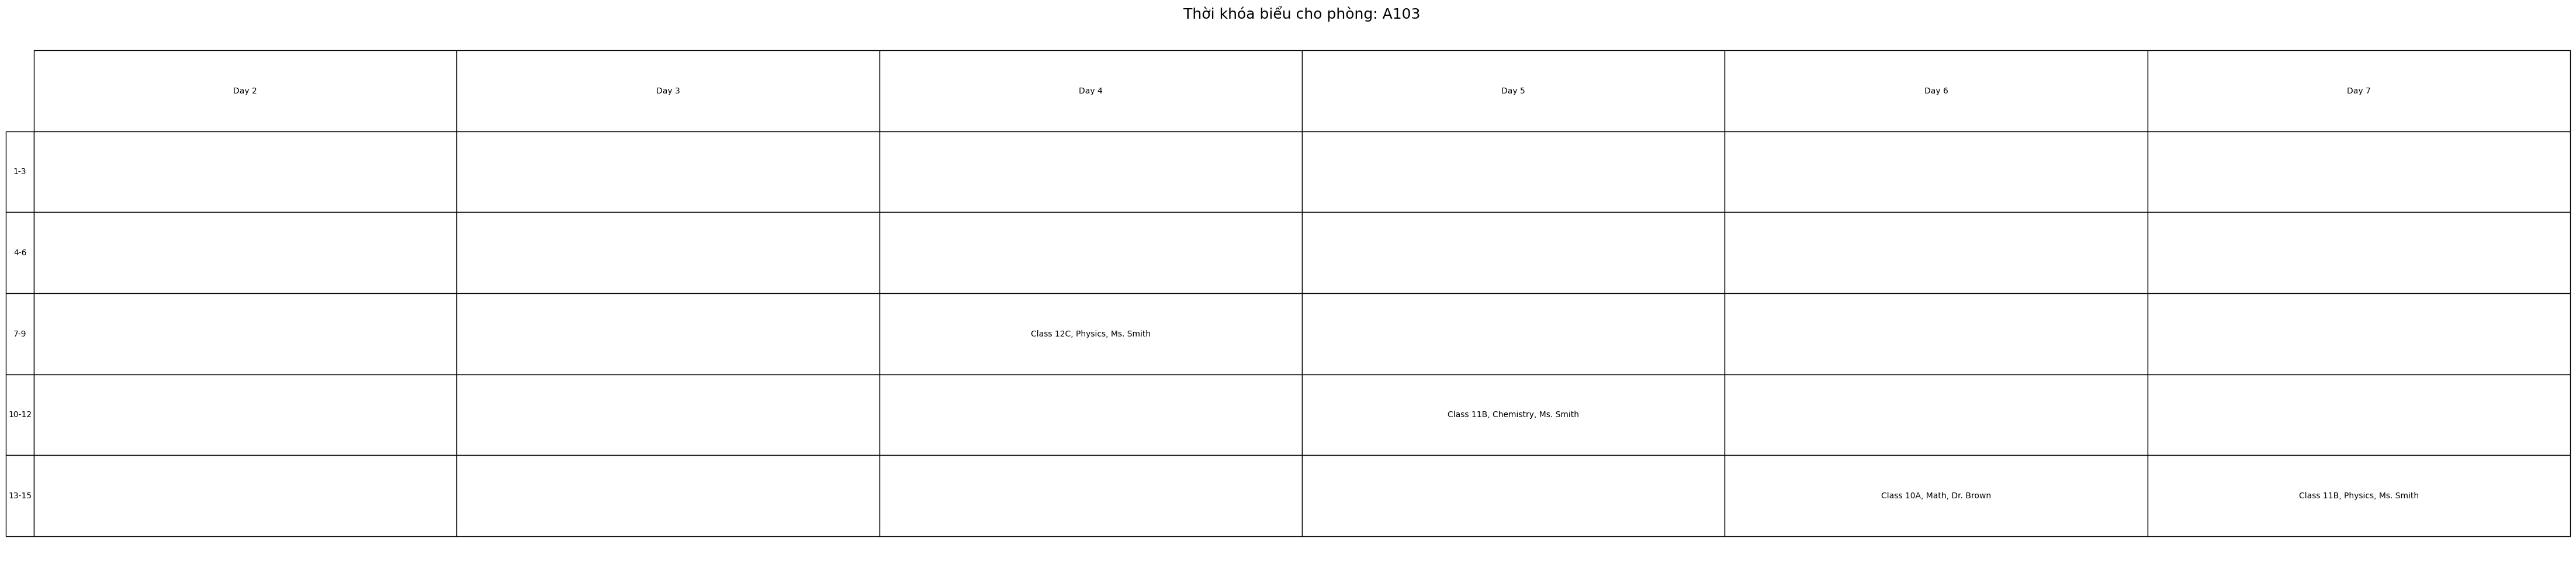

In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Thông tin về dữ liệu
NUM_PERIODS = 5   # Số ca học trong ngày
NUM_DAYS = 6      # Số ngày học trong tuần (Thứ 2 - Thứ 7)
NUM_ROOMS = 3   # Số lượng phòng học
POPULATION_SIZE = 50
NUM_GENERATIONS = 150
MUTATION_RATE = 0.1

# Tạo dữ liệu mẫu
# rooms = ['A101']
rooms = ['A101', 'A102', 'A103']
teachers = ['Mr. John', 'Ms. Smith', 'Dr. Brown']
classes = ['Class 10A', 'Class 11B', 'Class 12C']
subjects = ['Math', 'Physics', 'Chemistry', 'Biology']
time_slots = ['1-3', '4-6', '7-9', '10-12', '13-15']

# Môn học mà giảng viên có thể dạy
teacher_subjects = {
    'Mr. John': ['Math', 'Biology'],
    'Ms. Smith': ['Physics', 'Chemistry'],
    'Dr. Brown': ['Math', 'Physics']
}

# Thời gian rảnh của giảng viên
teacher_free_time = {
    'Mr. John': [(0, 0), (1, 1), (3, 2)],   # (ca học, ngày)
    'Ms. Smith': [(2, 2), (3, 3), (4, 5)],  # (ca học, ngày)
    'Dr. Brown': [(0, 1), (2, 0), (4, 4)]   # (ca học, ngày)
}

min_subject_sessions = {
    'Math': 3,
    'Physics': 2,
    'Chemistry': 4,
    'Biology': 2
}


# Khởi tạo ngẫu nhiên yêu cầu về môn học và giáo viên
requests = []
for cls in classes:
    for subject in subjects:
        valid_teachers = [t for t, sub in teacher_subjects.items() if subject in sub]
        if not valid_teachers:
            continue
        teacher = random.choice(valid_teachers)
        num_periods = random.randint(1, 2)
        requests.append((cls, subject, teacher, num_periods))

# Mã hóa nhiễm sắc thể
def generate_chromosome():
    chromosome = np.full((NUM_PERIODS, NUM_DAYS, NUM_ROOMS), None)
    for req in requests:
        cls, subject, teacher, num_periods = req
        periods_assigned = 0
        while periods_assigned < num_periods:
            day = random.randint(0, NUM_DAYS - 1)
            period = random.randint(0, NUM_PERIODS - 1)
            room = random.randint(0, NUM_ROOMS - 1)
            if chromosome[period, day, room] is None:
                if (period, day) not in teacher_free_time[teacher]:
                    continue
                chromosome[period, day, room] = f"{cls}, {subject}, {teacher}"
                periods_assigned += 1
    return chromosome


# Khởi tạo quần thể
population = [generate_chromosome() for _ in range(POPULATION_SIZE)]

# Hàm fitness
def fitness(chromosome):
    violations = 0
    subject_count = {subject: 0 for subject in subjects}

    for period in range(NUM_PERIODS):
        for day in range(NUM_DAYS):
            teacher_set = set()
            class_set = set()
            for room in range(NUM_ROOMS):
                entry = chromosome[period, day, room]
                if entry:
                    cls, subject, teacher = entry.split(", ")
                    # Kiểm tra giảng viên dạy đúng môn
                    if subject not in teacher_subjects.get(teacher, []):
                        violations += 10
                    # Kiểm tra trùng giờ của giảng viên
                    if teacher in teacher_set:
                        violations += 5
                    # Kiểm tra giảng viên dạy ngoài thời gian rảnh
                    if (period, day) not in teacher_free_time[teacher]:
                        violations += 8
                    teacher_set.add(teacher)
                    # Kiểm tra lớp học không bị trùng giờ
                    if cls in class_set:
                        violations += 5
                    class_set.add(cls)
                    # Đếm số buổi học cho từng môn
                    subject_count[subject] += 1

    # Kiểm tra số buổi học tối thiểu cho từng môn
    for subject, min_sessions in min_subject_sessions.items():
        if subject_count[subject] < min_sessions:
            violations += (min_sessions - subject_count[subject]) * 10  # Cộng điểm phạt

    return 1 / (1 + violations)


# Tiến hóa
for generation in range(NUM_GENERATIONS):
    population = sorted(population, key=lambda x: fitness(x), reverse=True)
    new_population = population[:POPULATION_SIZE // 2]

    while len(new_population) < POPULATION_SIZE:
        parent1, parent2 = random.choices(new_population, k=2)
        child = parent1.copy()
        for period in range(NUM_PERIODS):
            for day in range(NUM_DAYS):
                if random.random() < 0.5:
                    child[period, day] = parent2[period, day]
        if random.random() < MUTATION_RATE:
            period = random.randint(0, NUM_PERIODS - 1)
            day = random.randint(0, NUM_DAYS - 1)
            room = random.randint(0, NUM_ROOMS - 1)
            request = random.choice(requests)
            cls, subject, teacher, _ = request
            child[period, day, room] = f"{cls}, {subject}, {teacher}"
        new_population.append(child)

    population = new_population

# Kết quả tốt nhất
best_schedule = max(population, key=fitness)

# Hiển thị thời khóa biểu
schedule_data = []
for period in range(NUM_PERIODS):
    for day in range(NUM_DAYS):
        for room in range(NUM_ROOMS):
            entry = best_schedule[period, day, room]
            if entry:
                cls, subject, teacher = entry.split(", ")
                schedule_data.append({
                    "Period": time_slots[period],
                    "Day": day + 2,
                    "Room": rooms[room],
                    "Class": cls,
                    "Subject": subject,
                    "Teacher": teacher
                })

# Tạo DataFrame
df_schedule = pd.DataFrame(schedule_data)

# Visualization
for room in rooms:
    room_schedule = df_schedule[df_schedule["Room"] == room]
    timetable = pd.DataFrame(index=time_slots, columns=[f"Day {i}" for i in range(2, 8)])

    for _, row in room_schedule.iterrows():
        period = row["Period"]
        day = f"Day {row['Day']}"
        info = f"{row['Class']}, {row['Subject']}, {row['Teacher']}"
        timetable.loc[period, day] = info

    timetable.fillna("", inplace=True)

    # Plotting the timetable
    fig, ax = plt.subplots(figsize=(20, 12))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=timetable.values, colLabels=timetable.columns,
                     rowLabels=timetable.index, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(2.8, 2.8)

    for (i, j), cell in table.get_celld().items():
        cell.set_text_props(ha='center', va='center', wrap=True)
        cell.set_height(0.15)  # Tăng chiều cao ô

    plt.title(f"Thời khóa biểu cho phòng: {room}", fontsize=18)
    plt.show()


In [23]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Thông tin về dữ liệu
NUM_PERIODS = 5   # Số ca học trong ngày
NUM_DAYS = 6      # Số ngày học trong tuần (Thứ 2 - Thứ 7)
NUM_ROOMS = 3   # Số lượng phòng học
POPULATION_SIZE = 50
NUM_GENERATIONS = 3
MUTATION_RATE = 0.1

# Tạo dữ liệu mẫu
# rooms = ['A101']
# rooms = ['A101', 'A102', 'A103']
# teachers = ['Mr. John', 'Ms. Smith', 'Dr. Brown']
# classes = ['Class 10A', 'Class 11B', 'Class 12C']
# subjects = ['Math', 'Physics', 'Chemistry', 'Biology']
# time_slots = ['1-3', '4-6', '7-9', '10-12', '13-15']

# # Môn học mà giảng viên có thể dạy
# teacher_subjects = {
#     'Mr. John': ['Math', 'Biology'],
#     'Ms. Smith': ['Physics', 'Chemistry'],
#     'Dr. Brown': ['Math', 'Physics']
# }

# # Thời gian rảnh của giảng viên
# teacher_free_time = {
#     'Mr. John': [(0, 0), (1, 1), (3, 2)],   # (ca học, ngày)
#     'Ms. Smith': [(2, 2), (3, 3), (4, 5)],  # (ca học, ngày)
#     'Dr. Brown': [(0, 1), (2, 0), (4, 4)]   # (ca học, ngày)
# }

# min_subject_sessions = {
#     'Math': 3,
#     'Physics': 2,
#     'Chemistry': 4,
#     'Biology': 2
# }

# Danh sách phòng học với loại phòng
rooms = {
    'A101': 'regular',      # Phòng thường
    'A102': 'computer',     # Phòng máy tính
    'A103': 'electronics'   # Phòng điện tử
}

teachers = ['Mr. John', 'Ms. Smith', 'Dr. Brown']
classes = ['Class 10A', 'Class 11B', 'Class 12C']
subjects = ['Math', 'Physics', 'Chemistry', 'Biology', 'Informatics', 'Electronics']
time_slots = ['1-3', '4-6', '7-9', '10-12', '13-15']

# Môn học mà giảng viên có thể dạy
teacher_subjects = {
    'Mr. John': ['Math', 'Biology', 'Informatics'],
    'Ms. Smith': ['Physics', 'Chemistry', 'Electronics'],
    'Dr. Brown': ['Math', 'Physics', 'Informatics']
}

# Yêu cầu về phòng học cho từng môn
subject_room_requirements = {
    'Informatics': 'computer',
    'Electronics': 'electronics',
    'Math': 'regular',
    'Physics': 'regular',
    'Chemistry': 'regular',
    'Biology': 'regular'
}

# Thời gian rảnh của giảng viên
teacher_free_time = {
    'Mr. John': [(0, 0), (1, 1), (3, 2)],
    'Ms. Smith': [(2, 2), (3, 3), (4, 5)],
    'Dr. Brown': [(0, 1), (2, 0), (4, 4)]
}

# Ràng buộc số lượng buổi học tối thiểu cho từng môn
min_subject_sessions = {
    'Math': 3,
    'Physics': 2,
    'Chemistry': 4,
    'Biology': 2,
    'Informatics': 3,
    'Electronics': 3
}


# Khởi tạo ngẫu nhiên yêu cầu về môn học và giáo viên
requests = []
for cls in classes:
    for subject in subjects:
        valid_teachers = [t for t, sub in teacher_subjects.items() if subject in sub]
        if not valid_teachers:
            continue
        teacher = random.choice(valid_teachers)
        num_periods = random.randint(1, 2)
        requests.append((cls, subject, teacher, num_periods))

# Mã hóa nhiễm sắc thể
def generate_chromosome():
    chromosome = np.full((NUM_PERIODS, NUM_DAYS, len(rooms)), None)
    room_list = list(rooms.keys())

    for req in requests:
        cls, subject, teacher, num_periods = req
        periods_assigned = 0
        while periods_assigned < num_periods:
            day = random.randint(0, NUM_DAYS - 1)
            period = random.randint(0, NUM_PERIODS - 1)
            room_index = random.randint(0, len(room_list) - 1)
            room = room_list[room_index]
            
            # Kiểm tra yêu cầu về phòng học
            required_room_type = subject_room_requirements.get(subject, 'regular')
            if rooms[room] != required_room_type:
                continue

            if chromosome[period, day, room_index] is None:
                if (period, day) not in teacher_free_time[teacher]:
                    continue
                chromosome[period, day, room_index] = f"{cls}, {subject}, {teacher}"
                periods_assigned += 1
    return chromosome


# Khởi tạo quần thể
population = [generate_chromosome() for _ in range(POPULATION_SIZE)]

# Hàm fitness
def fitness(chromosome):
    violations = 0
    subject_count = {subject: 0 for subject in subjects}
    room_list = list(rooms.keys())

    for period in range(NUM_PERIODS):
        for day in range(NUM_DAYS):
            teacher_set = set()
            class_set = set()
            for room_index in range(len(room_list)):
                entry = chromosome[period, day, room_index]
                room = room_list[room_index]

                if entry:
                    cls, subject, teacher = entry.split(", ")
                    # Kiểm tra giảng viên dạy đúng môn
                    if subject not in teacher_subjects.get(teacher, []):
                        violations += 10
                    # Kiểm tra trùng giờ của giảng viên
                    if teacher in teacher_set:
                        violations += 5
                    # Kiểm tra giảng viên dạy ngoài thời gian rảnh
                    if (period, day) not in teacher_free_time[teacher]:
                        violations += 8
                    # Kiểm tra yêu cầu về phòng học
                    required_room_type = subject_room_requirements.get(subject, 'regular')
                    if rooms[room] != required_room_type:
                        violations += 15
                    teacher_set.add(teacher)
                    # Kiểm tra lớp học không bị trùng giờ
                    if cls in class_set:
                        violations += 5
                    class_set.add(cls)
                    # Đếm số buổi học cho từng môn
                    subject_count[subject] += 1

    # Kiểm tra số buổi học tối thiểu cho từng môn
    for subject, min_sessions in min_subject_sessions.items():
        if subject_count[subject] < min_sessions:
            violations += (min_sessions - subject_count[subject]) * 10

    return 1 / (1 + violations)



# Tiến hóa
for generation in range(NUM_GENERATIONS):
    population = sorted(population, key=lambda x: fitness(x), reverse=True)
    new_population = population[:POPULATION_SIZE // 2]

    while len(new_population) < POPULATION_SIZE:
        parent1, parent2 = random.choices(new_population, k=2)
        child = parent1.copy()
        for period in range(NUM_PERIODS):
            for day in range(NUM_DAYS):
                if random.random() < 0.5:
                    child[period, day] = parent2[period, day]
        if random.random() < MUTATION_RATE:
            period = random.randint(0, NUM_PERIODS - 1)
            day = random.randint(0, NUM_DAYS - 1)
            room = random.randint(0, NUM_ROOMS - 1)
            request = random.choice(requests)
            cls, subject, teacher, _ = request
            child[period, day, room] = f"{cls}, {subject}, {teacher}"
        new_population.append(child)

    population = new_population

# Kết quả tốt nhất
best_schedule = max(population, key=fitness)

# Hiển thị thời khóa biểu
schedule_data = []
for period in range(NUM_PERIODS):
    for day in range(NUM_DAYS):
        for room in range(NUM_ROOMS):
            entry = best_schedule[period, day, room]
            if entry:
                cls, subject, teacher = entry.split(", ")
                schedule_data.append({
                    "Period": time_slots[period],
                    "Day": day + 2,
                    "Room": rooms[room],
                    "Class": cls,
                    "Subject": subject,
                    "Teacher": teacher
                })

# Tạo DataFrame
df_schedule = pd.DataFrame(schedule_data)

# Visualization
for room in rooms:
    room_schedule = df_schedule[df_schedule["Room"] == room]
    timetable = pd.DataFrame(index=time_slots, columns=[f"Day {i}" for i in range(2, 8)])

    for _, row in room_schedule.iterrows():
        period = row["Period"]
        day = f"Day {row['Day']}"
        info = f"{row['Class']}, {row['Subject']}, {row['Teacher']}"
        timetable.loc[period, day] = info

    timetable.fillna("", inplace=True)

    # Plotting the timetable
    fig, ax = plt.subplots(figsize=(20, 12))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=timetable.values, colLabels=timetable.columns,
                     rowLabels=timetable.index, cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(2.8, 2.8)

    for (i, j), cell in table.get_celld().items():
        cell.set_text_props(ha='center', va='center', wrap=True)
        cell.set_height(0.15)  # Tăng chiều cao ô

    plt.title(f"Thời khóa biểu cho phòng: {room}", fontsize=18)
    plt.show()


KeyboardInterrupt: 

1. Công thức toán học cho bài toán lập thời khóa biểu

Bài toán lập thời khóa biểu này có thể được mô hình hóa dưới dạng bài toán tối ưu hóa ràng buộc với mục tiêu là tìm kiếm một thời khóa biểu tối ưu sao cho các ràng buộc được thỏa mãn tối đa.
Mô hình hóa bài toán:

    Ký hiệu:
        PP: Tập hợp các ca học (Periods).
        DD: Tập hợp các ngày học (Days).
        RR: Tập hợp các phòng học (Rooms).
        CC: Tập hợp các lớp học (Classes).
        TT: Tập hợp các giảng viên (Teachers).
        SS: Tập hợp các môn học (Subjects).
        xp,d,rxp,d,r​: Biến quyết định, biểu diễn thông tin lớp học và môn học được xếp tại ca học pp, ngày dd, phòng rr.

Hàm mục tiêu:

Hàm mục tiêu là tối thiểu hóa tổng số vi phạm ràng buộc:
Minimize f(x)=∑i=1nαi×Vi
Minimize f(x)=i=1∑n​αi​×Vi​

    ViVi​: Số lượng vi phạm ràng buộc thứ ii.
    αiαi​: Hệ số phạt cho vi phạm ràng buộc thứ ii.

2. Các ràng buộc và công thức
Ràng buộc	Công thức toán học	Mô tả
1. Dạy đúng môn chuyên môn	∀p,d,r:subject∈teacher_subjects(teacher)∀p,d,r:subject∈teacher_subjects(teacher)	Môn học được xếp phải thuộc chuyên môn của giảng viên.
2. Không trùng giờ giảng viên	∀p,d:∑rxp,d,r(teacher)≤1∀p,d:∑r​xp,d,r​(teacher)≤1	Giảng viên không được dạy nhiều hơn 1 lớp trong cùng một ca học.
3. Dạy đúng thời gian rảnh	∀p,d:(p,d)∈teacher_free_time(teacher)∀p,d:(p,d)∈teacher_free_time(teacher)	Giảng viên chỉ được xếp dạy vào thời gian rảnh của họ.
4. Yêu cầu phòng học phù hợp	∀p,d,r:room_type(r)=subject_requirement(subject)∀p,d,r:room_type(r)=subject_requirement(subject)	Môn học yêu cầu phòng học phù hợp (máy tính, điện tử).
5. Không trùng giờ lớp học	∀p,d:∑rxp,d,r(class)≤1∀p,d:∑r​xp,d,r​(class)≤1	Lớp học chỉ được học một môn tại mỗi ca học.
6. Số buổi học tối thiểu	∑p,d,rxp,d,r(subject)≥min_sessions(subject)∑p,d,r​xp,d,r​(subject)≥min_sessions(subject)	Đảm bảo mỗi môn học được xếp đủ số buổi tối thiểu trong tuần.
3. Phép toán di truyền trong mô hình
Khởi tạo quần thể:

    Tạo ra các nhiễm sắc thể (chromosomes) ngẫu nhiên bằng cách gán các lớp học, môn học, và giảng viên vào thời khóa biểu sao cho các ràng buộc cơ bản được đảm bảo ngay từ đầu.
    Mỗi nhiễm sắc thể là một ma trận 3 chiều kích thước (P×D×R)(P×D×R).

Hàm fitness:

    Đo lường độ thích nghi của mỗi nhiễm sắc thể bằng cách tính tổng số vi phạm ràng buộc.
    Công thức hàm fitness:
    Fitness=11+∑i=1nαi×Vi
    Fitness=1+∑i=1n​αi​×Vi​1​

Lựa chọn (Selection):

    Chọn ra một tập hợp con các cá thể tốt nhất trong quần thể dựa trên hàm fitness để tiến hành lai ghép (crossover) và đột biến (mutation).

Lai ghép (Crossover):

    Lai ghép hai cá thể cha mẹ bằng cách kết hợp các phần của nhiễm sắc thể của chúng.
    Sử dụng phương pháp lai ghép một phần:
    child[p,d]={parent1[p,d],if random()<0.5parent2[p,d],otherwise
    child[p,d]={parent1[p,d],parent2[p,d],​if random()<0.5otherwise​

Đột biến (Mutation):

    Thay đổi ngẫu nhiên một phần của nhiễm sắc thể để tạo sự đa dạng và tránh mắc kẹt trong cực trị địa phương.
    Đột biến xảy ra với xác suất MUTATION_RATEMUTATION_RATE:
    if random()<MUTATION_RATE: mutate a random element
    if random()<MUTATION_RATE: mutate a random element

Tóm tắt:

    Mô hình toán học sử dụng hàm mục tiêu tối thiểu hóa tổng số vi phạm ràng buộc với các hệ số phạt khác nhau.
    Phép toán di truyền bao gồm: khởi tạo quần thể, hàm fitness, lựa chọn, lai ghép, và đột biến.
    Ràng buộc được kiểm tra ở từng bước của quá trình tiến hóa để đảm bảo rằng thời khóa biểu cuối cùng thỏa mãn các yêu cầu thực tế.